In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"
#dataFramePickleAddress="D:/Non-academic/GSOC23/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

,Max Lat per section,Min Lat per section,Max Lon per section,Min Lon per section,No. of spectra per section,Total active time per section,Summed Spectra,Normalized Spectra,Log Normalized Spectra,Aluminum,...,Magnesium,Oxygen,Potassium,Silicon,Thorium,Titanium,Uranium,Denoised Log Scaled Spectra,Continuum Removed Denoised Log Scaled Spectra,Normalized Continuum Removed Denoised Log Scaled Spectra
0,-87.5,-90.0,180.0,-180.0,7002,215153.707937,"[270112.3731329723, 44221.71628033137, 45327.9...","[75.32634479500912, 12.332127585726989, 12.640...","[1.8769468938381042, 1.0910380092016139, 1.101...",15.151,...,3.5168,45.289,299.99,20.793,0.46453,0.17034,0.17684,"[2.158214838616408, 2.157544331369737, 2.15556...","[0.0, 0.0031096864344261066, 0.005679290051129...","[0.0, 0.008732596361173385, 0.0159485365101445..."
1,-82.5,-87.5,-135.0,-180.0,1599,49113.391313,"[101728.76450092324, 11353.802617173642, 10565...","[124.27824075904886, 13.87051756806718, 12.906...","[2.0943950968999223, 1.1420926667518603, 1.110...",13.394,...,4.2240,45.529,376.77,22.029,0.65727,0.11806,0.14017,"[2.166600464940364, 2.1658480356144825, 2.1637...","[0.0, 0.0031162181188209015, 0.005685493606940...","[0.0, 0.00854362748004175, 0.01558772125881830..."
2,-82.5,-87.5,-90.0,-135.0,1940,59600.854365,"[69004.10988058499, 13041.311258502305, 12455....","[69.4662289143658, 13.12864863838364, 12.53878...","[1.8417737231418783, 1.118220025472807, 1.0982...",13.634,...,3.5352,44.660,375.20,20.907,0.59783,0.16417,0.25209,"[2.1624604406884194, 2.1617557577637347, 2.159...","[0.0, 0.003128077634203974, 0.0057268713902404...","[0.0, 0.008671523159558032, 0.0158757881675521..."
3,-82.5,-87.5,-45.0,-90.0,1818,55864.552890,"[51455.21453525051, 11348.088811988011, 11487....","[55.264254565457236, 12.188146033430378, 12.33...","[1.742444316396172, 1.085937649122431, 1.09122...",14.642,...,3.6490,44.706,255.60,20.687,0.44024,0.21359,0.15456,"[2.156835106449848, 2.156137776072336, 2.15427...","[0.0, 0.0031223821127568385, 0.005761526562635...","[0.0, 0.008548415452029046, 0.0157738293766423..."
4,-82.5,-87.5,0.0,-45.0,1855,57007.157885,"[51138.233213284286, 10203.879826977849, 12005...","[53.82296024948041, 10.739577490433051, 12.635...","[1.7309675801735431, 1.030987195964759, 1.1015...",14.030,...,3.4253,44.777,299.84,20.930,0.41695,0.00000,0.17853,"[2.1550525786763455, 2.15430812063849, 2.15245...","[0.0, 0.0030380779680346803, 0.005615903444584...","[0.0, 0.00860571082569534, 0.01590770269151066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,87.5,82.5,45.0,0.0,1748,53653.126808,"[172204.68795185376, 12837.986652251333, 11392...","[192.57556626933405, 14.356650673799725, 12.73...","[2.2846011835800297, 1.1570531332525222, 1.105...",14.908,...,4.8716,44.940,935.92,20.180,1.65770,0.11112,0.47992,"[2.15549824869262, 2.1548999596086973, 2.15302...","[0.0, 0.0031042509343501834, 0.005683791947784...","[0.0, 0.008672476703310141, 0.0158790491800041..."
1786,87.5,82.5,90.0,45.0,2035,62483.348769,"[69631.4865040512, 13027.290796013549, 12597.1...","[66.8640409410214, 12.509531949810704, 12.0964...","[1.8251926197192418, 1.0972410606592737, 1.082...",14.201,...,4.9509,45.074,725.37,20.989,1.47520,0.23089,0.31377,"[2.14741575183071, 2.14686561246586, 2.1451899...","[0.0, 0.003080477682960492, 0.0056969814199795...","[0.0, 0.008773223933367814, 0.0162250465303427..."
1787,87.5,82.5,135.0,90.0,1903,58474.988092,"[58870.11519813659, 11691.651373354718, 11794....","[60.40543191435932, 11.996566485773727, 12.102...","[1.781075993991352, 1.07905696524328, 1.082869...",14.718,...,3.5729,44.902,615.29,20.763,1.13880,0.14168,0.36836,"[2.1464838830391613, 2.1458006278534687, 2.143...","[0.0, 0.003018919479894744, 0.0055261654685280...","[0.0, 0.008498570047967925, 0.0155567263862845..."
1788,87.5,82.5,180.0,135.0,1902,58399.244640,"[69077.49428235987, 10543.676356979646, 11999....","[70.97094632772614, 10.832684314943478, 12.328...","[1.85108059

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

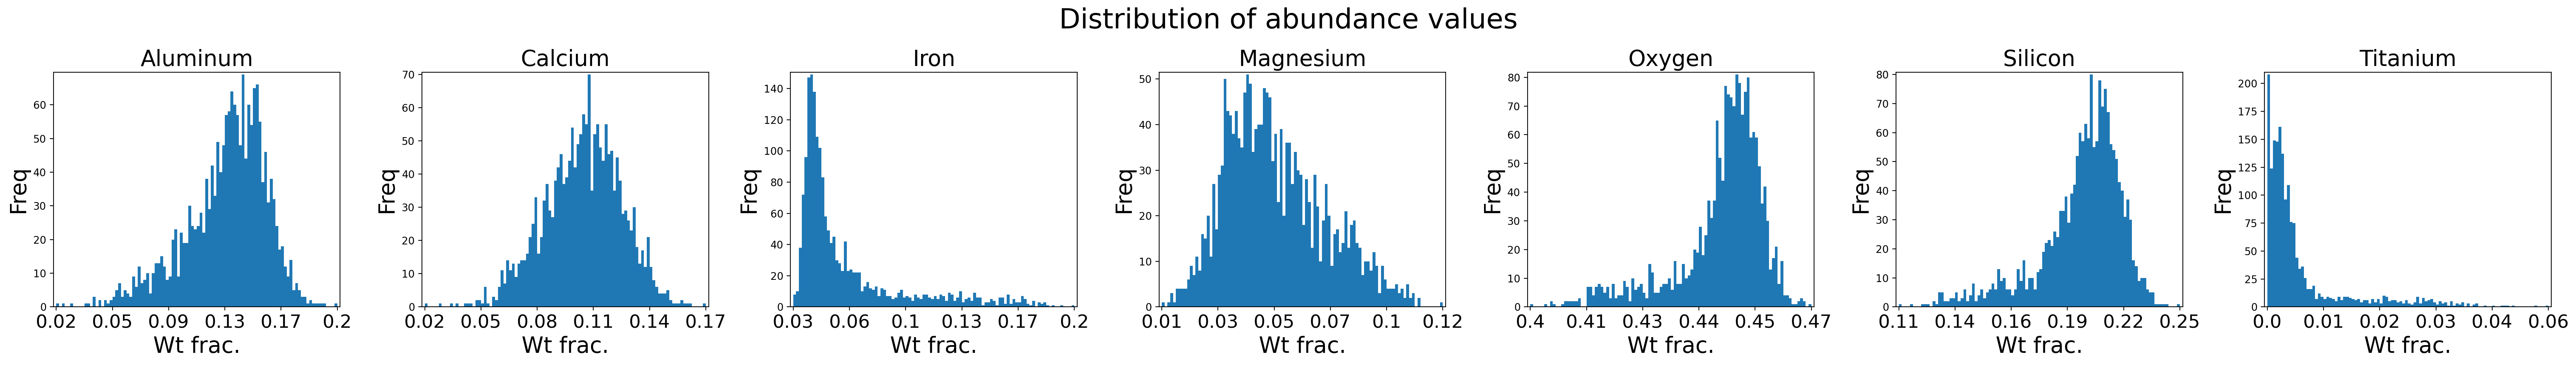

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

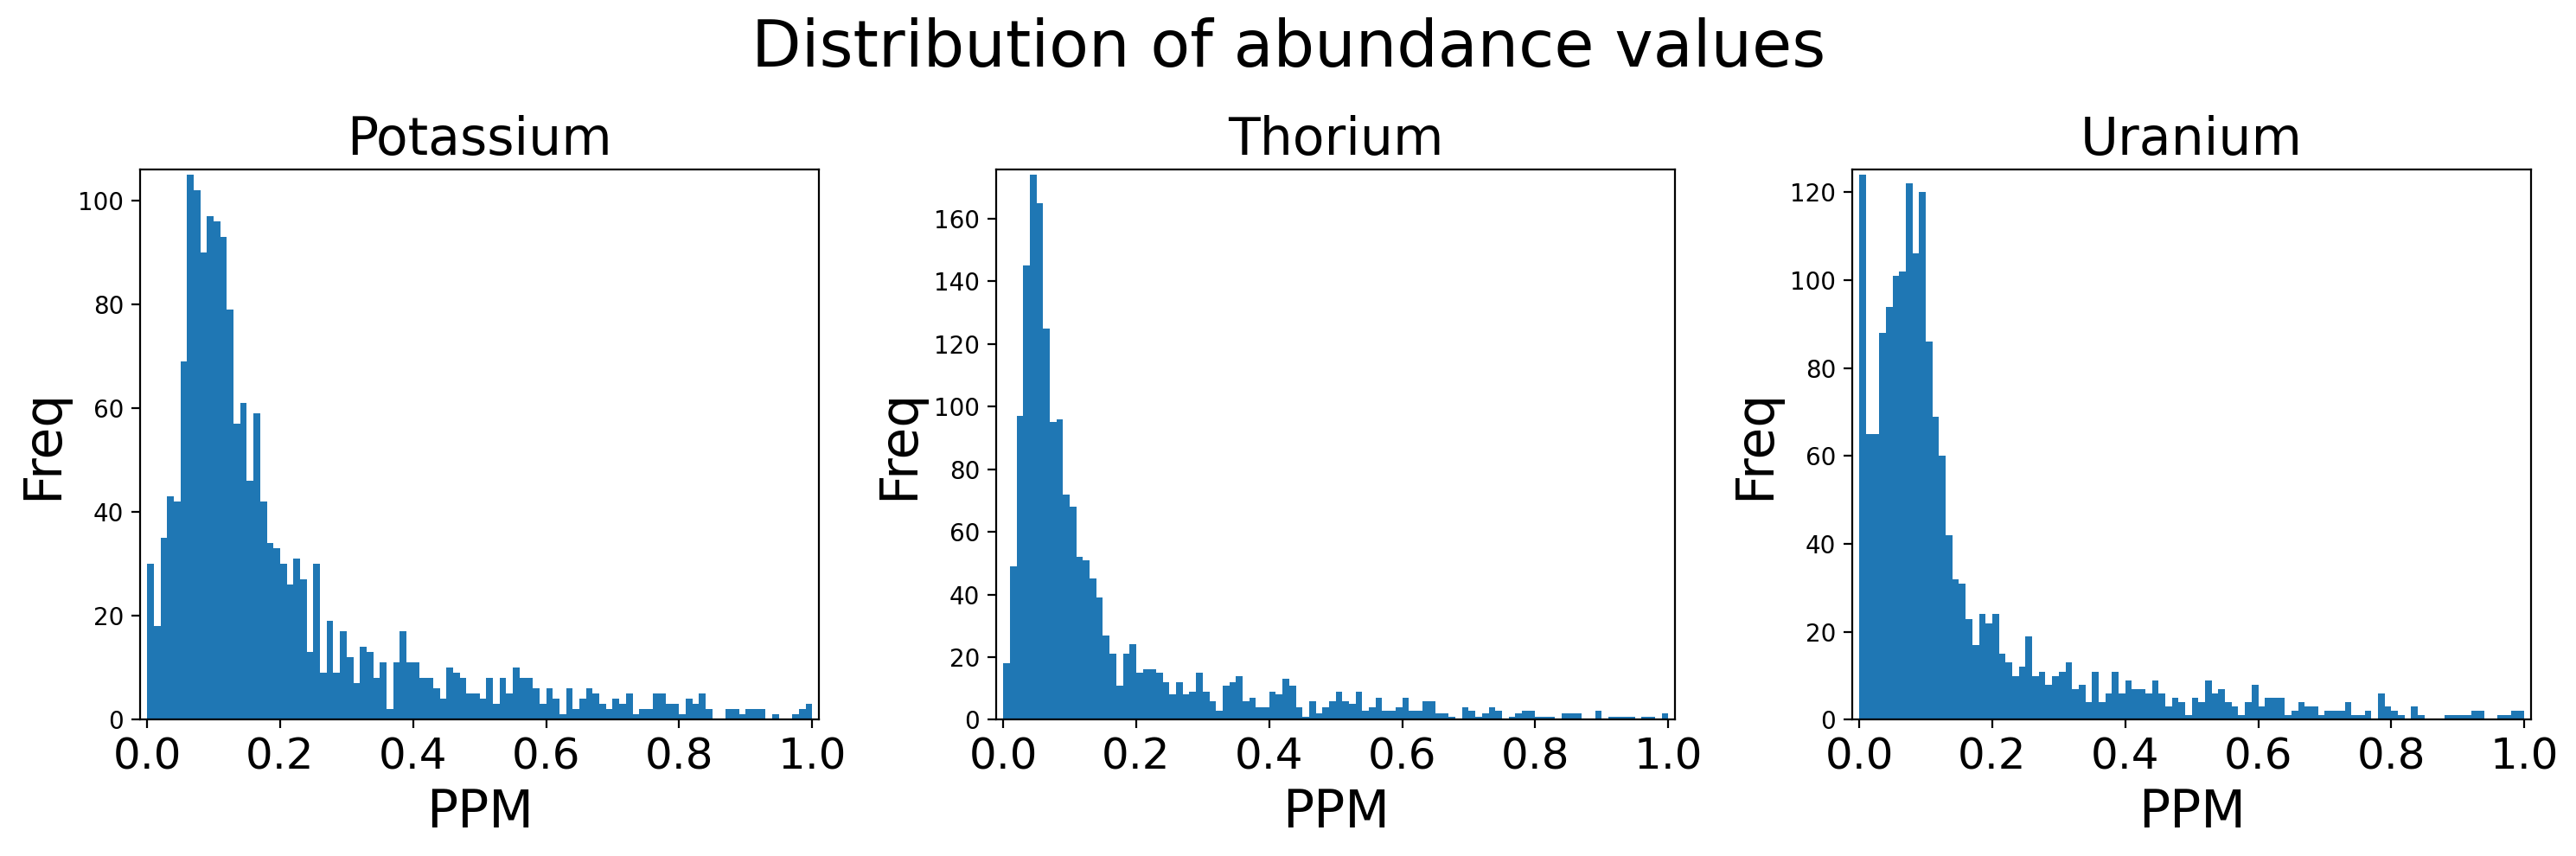

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

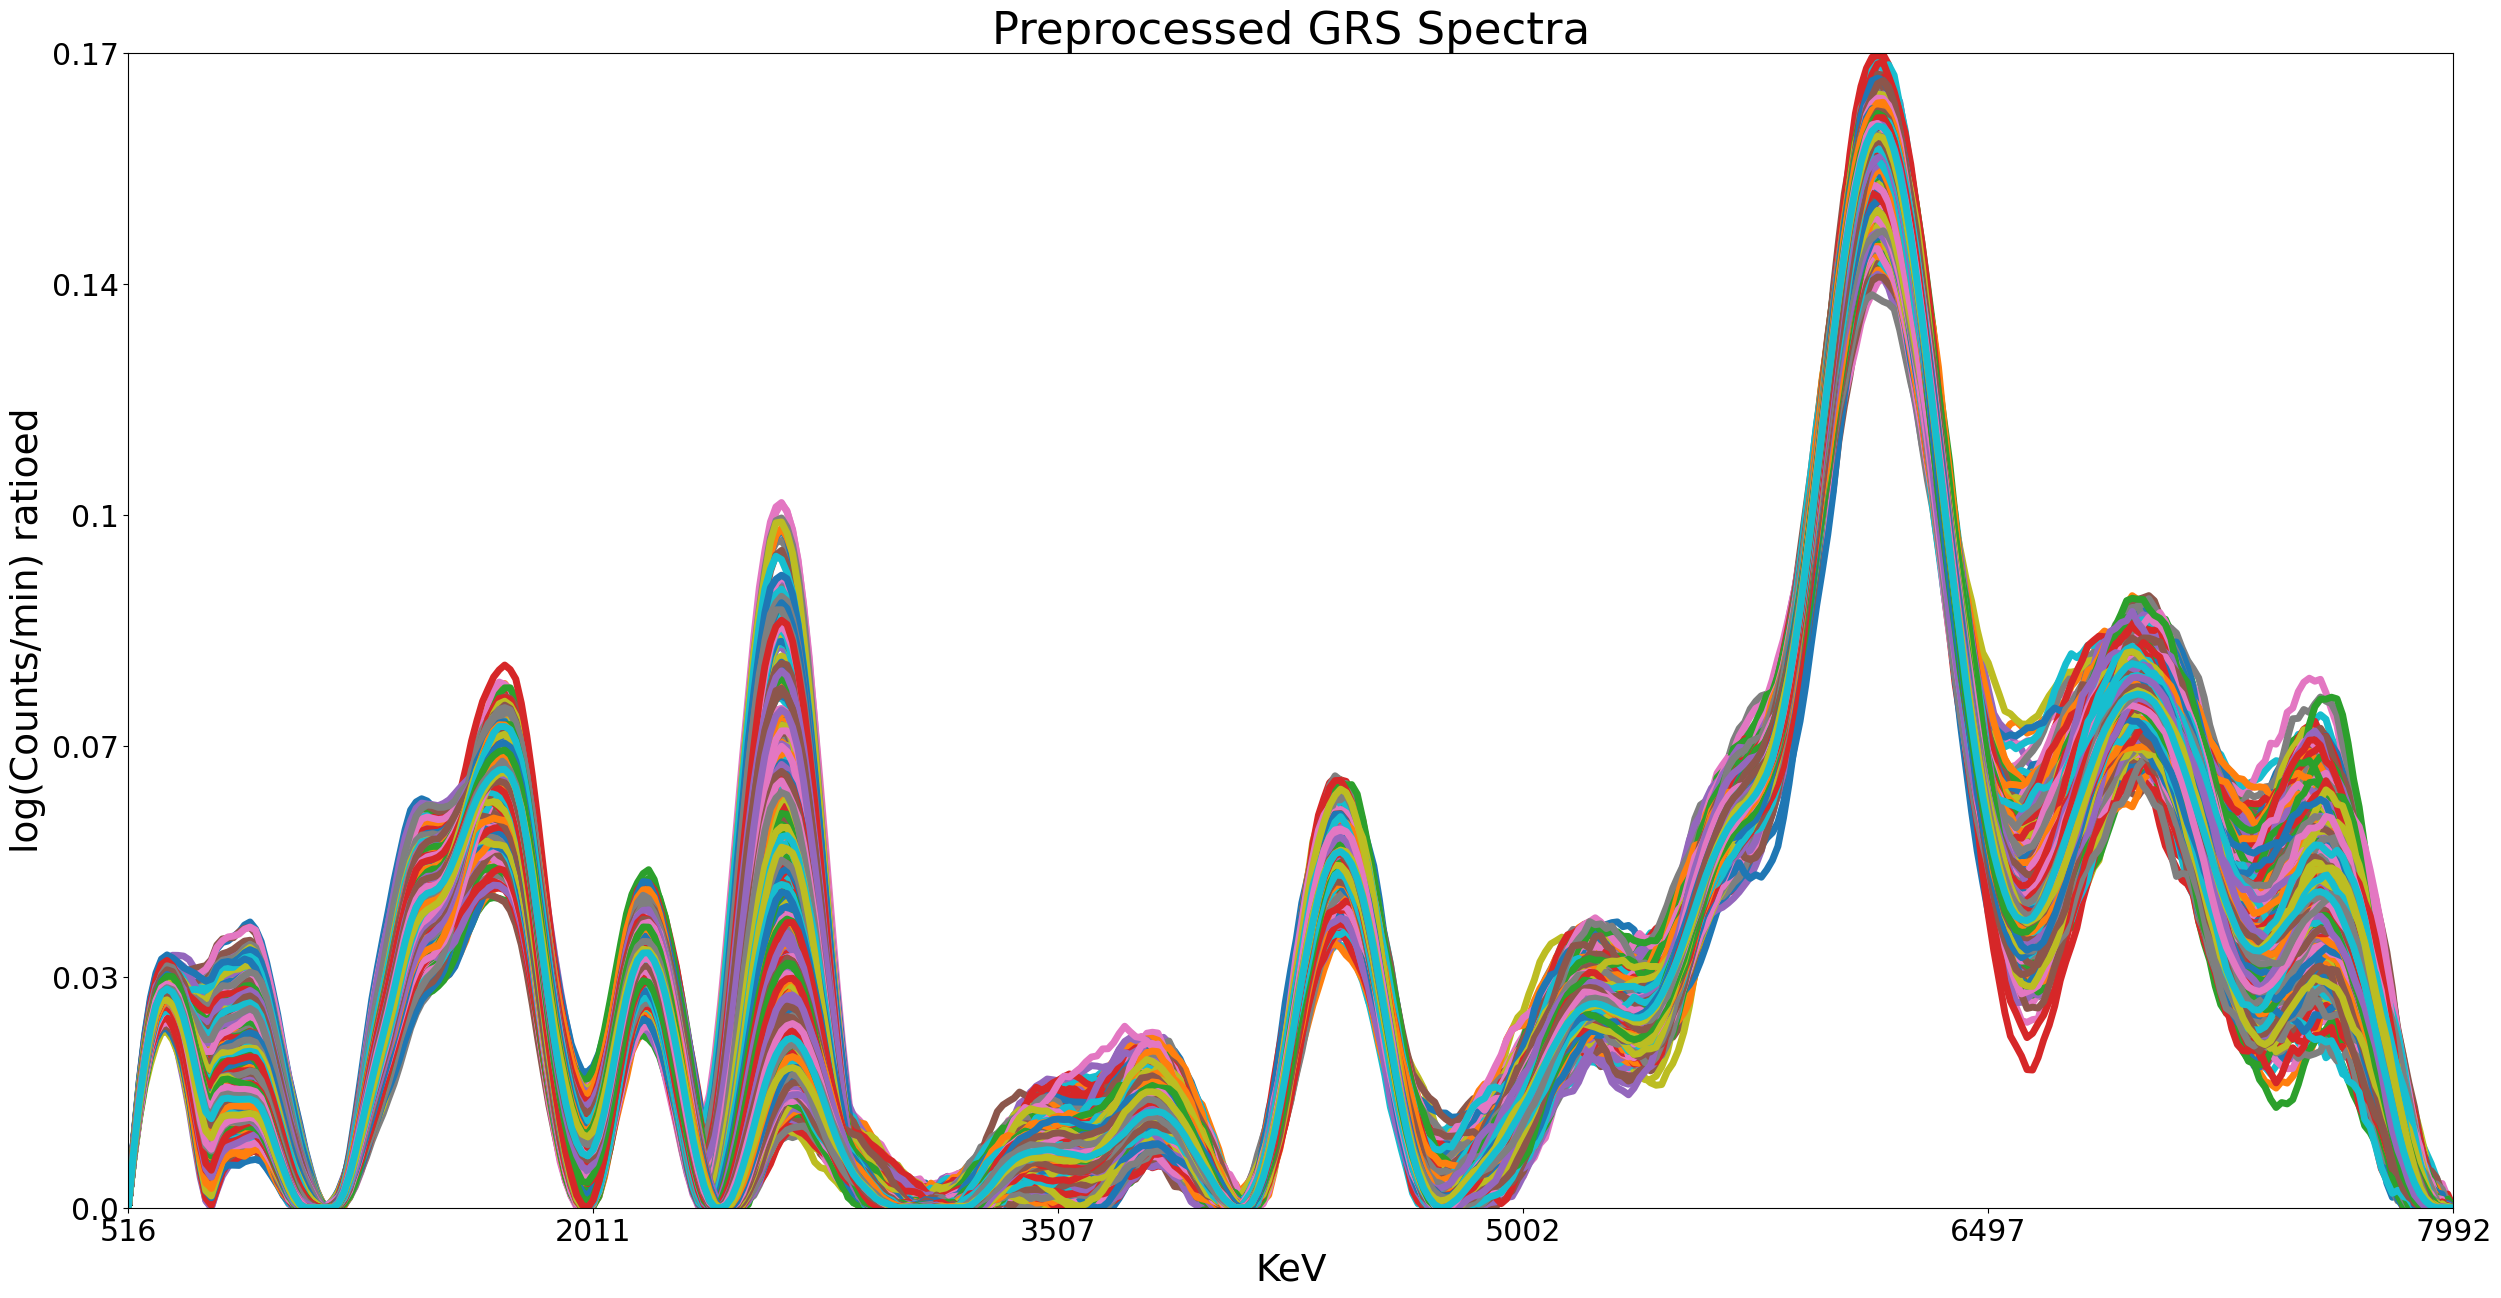

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import PCA from sklearn
from sklearn.decomposition import PCA
#import cosine distance from scipy
from scipy.spatial.distance import cosine as cosineDistance

#define a function which given an array of spectra, explained-variance ratio, and no of spectra to be selected
#returns the indices of most interesting (most unlike the others) spectra
def extractMostExtremeSpectraWithDEMUD(spectra,varianceToExplain,noOfSpectraToRetrive):
    #create an array to hold the indices of the selected (interesting) super-pixels
    selectedSpectraIndices=[]
    #create a PCA object which explains over 95% of the variance in the data
    pcaObject=PCA(n_components=varianceToExplain,
                  svd_solver='auto')
    #compute the PCA model for the spectra and use it to reconstruct the orginal spectra
    reconstructedSpectra=pcaObject.inverse_transform(pcaObject.fit_transform(spectra))
    #create an array to save the reconstruction error (cosine distance)
    reconstructionErrors=np.full(spectra.shape[0],
                                 np.nan)
    #compute the cosine distance between the orginal and reconstructed spectra
    for i in range(spectra.shape[0]):
        reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                               reconstructedSpectra[i,:])
    #save the index of the spectra with the greatest error
    selectedSpectraIndices.append(np.argmax(reconstructionErrors))

    #iteratively extract the most dissimar spectra
    for i in range(noOfSpectraToRetrive-1):
        #fit PCA to the selected spectra
        pcaObject.fit(spectra[selectedSpectraIndices,:])
        #apply PCA and then reconstruct the spectra
        reconstructedSpectra=pcaObject.inverse_transform(pcaObject.transform(spectra))
        #create an array to save the reconstruction error (cosine distance)
        reconstructionErrors=np.full(spectra.shape[0],np.nan)
        #compute the cosine distance between the orginal and reconstructed spectra
        for i in range(spectra.shape[0]):
            reconstructionErrors[i]=cosineDistance(spectra[i,:],
                                                   reconstructedSpectra[i,:])
        #remove the error of the selected pixels
        reconstructionErrors=np.delete(reconstructionErrors,
                                       selectedSpectraIndices)
        #get the index of the spectra with the greatest error
        selectedSpectraIndices.append(np.delete(np.arange(0,spectra.shape[0],1),
                                                selectedSpectraIndices,axis=0)[np.argmax(reconstructionErrors)])
        
    return selectedSpectraIndices

In [25]:
#set parameters for extracting differing spectra
varianceToBeExplainedDuringDEMUD=0.95
noOfExtremeSpectraToBeRetrieved=179
#get indices of the most extreme spectra
extremeIndices=extractMostExtremeSpectraWithDEMUD(preprocessedSpectra,
                                                  varianceToExplain=varianceToBeExplainedDuringDEMUD,
                                                  noOfSpectraToRetrive=noOfExtremeSpectraToBeRetrieved)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


In [26]:
#get the subset data
#spectra
preprocessedSpectra=preprocessedSpectra[extremeIndices,:]
#regular abundances
regularElementalAbundances=regularElementalAbundances[extremeIndices,:]
#nuclear abundances
nuclearElementalAbundances=nuclearElementalAbundances[extremeIndices,:]

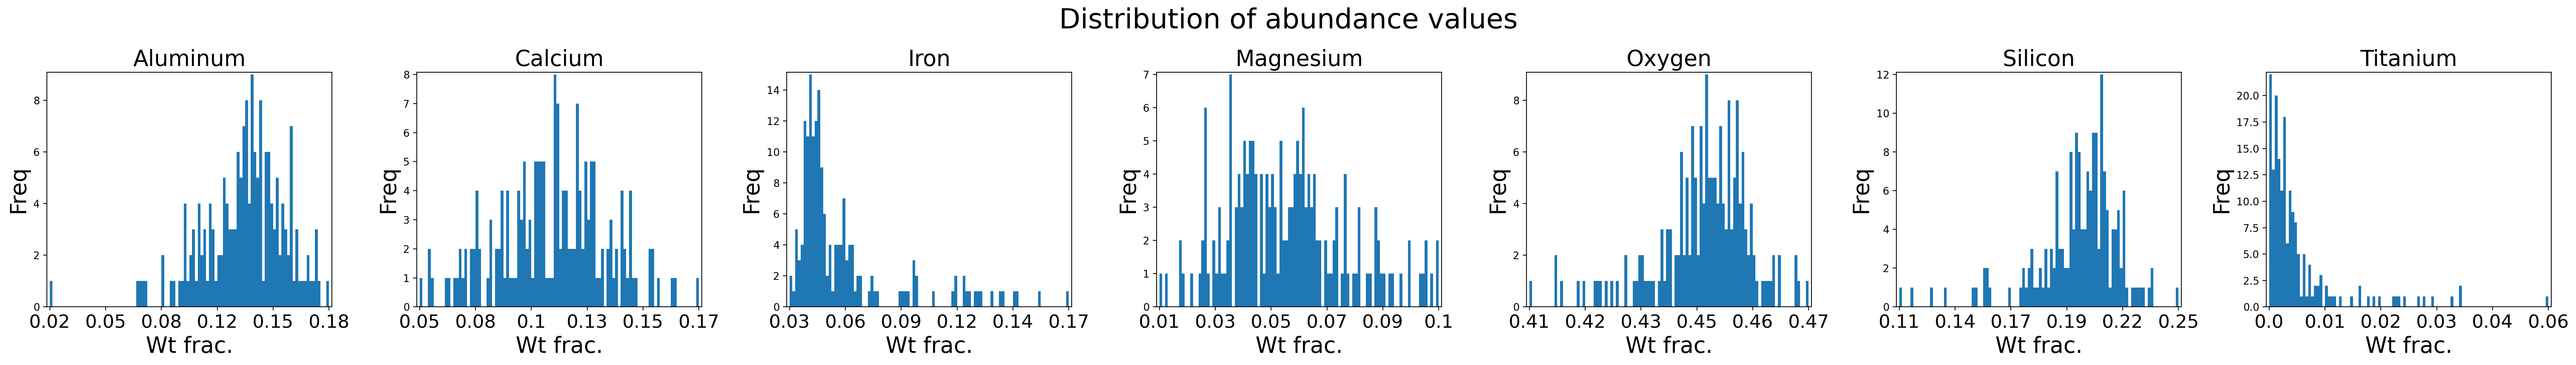

In [27]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

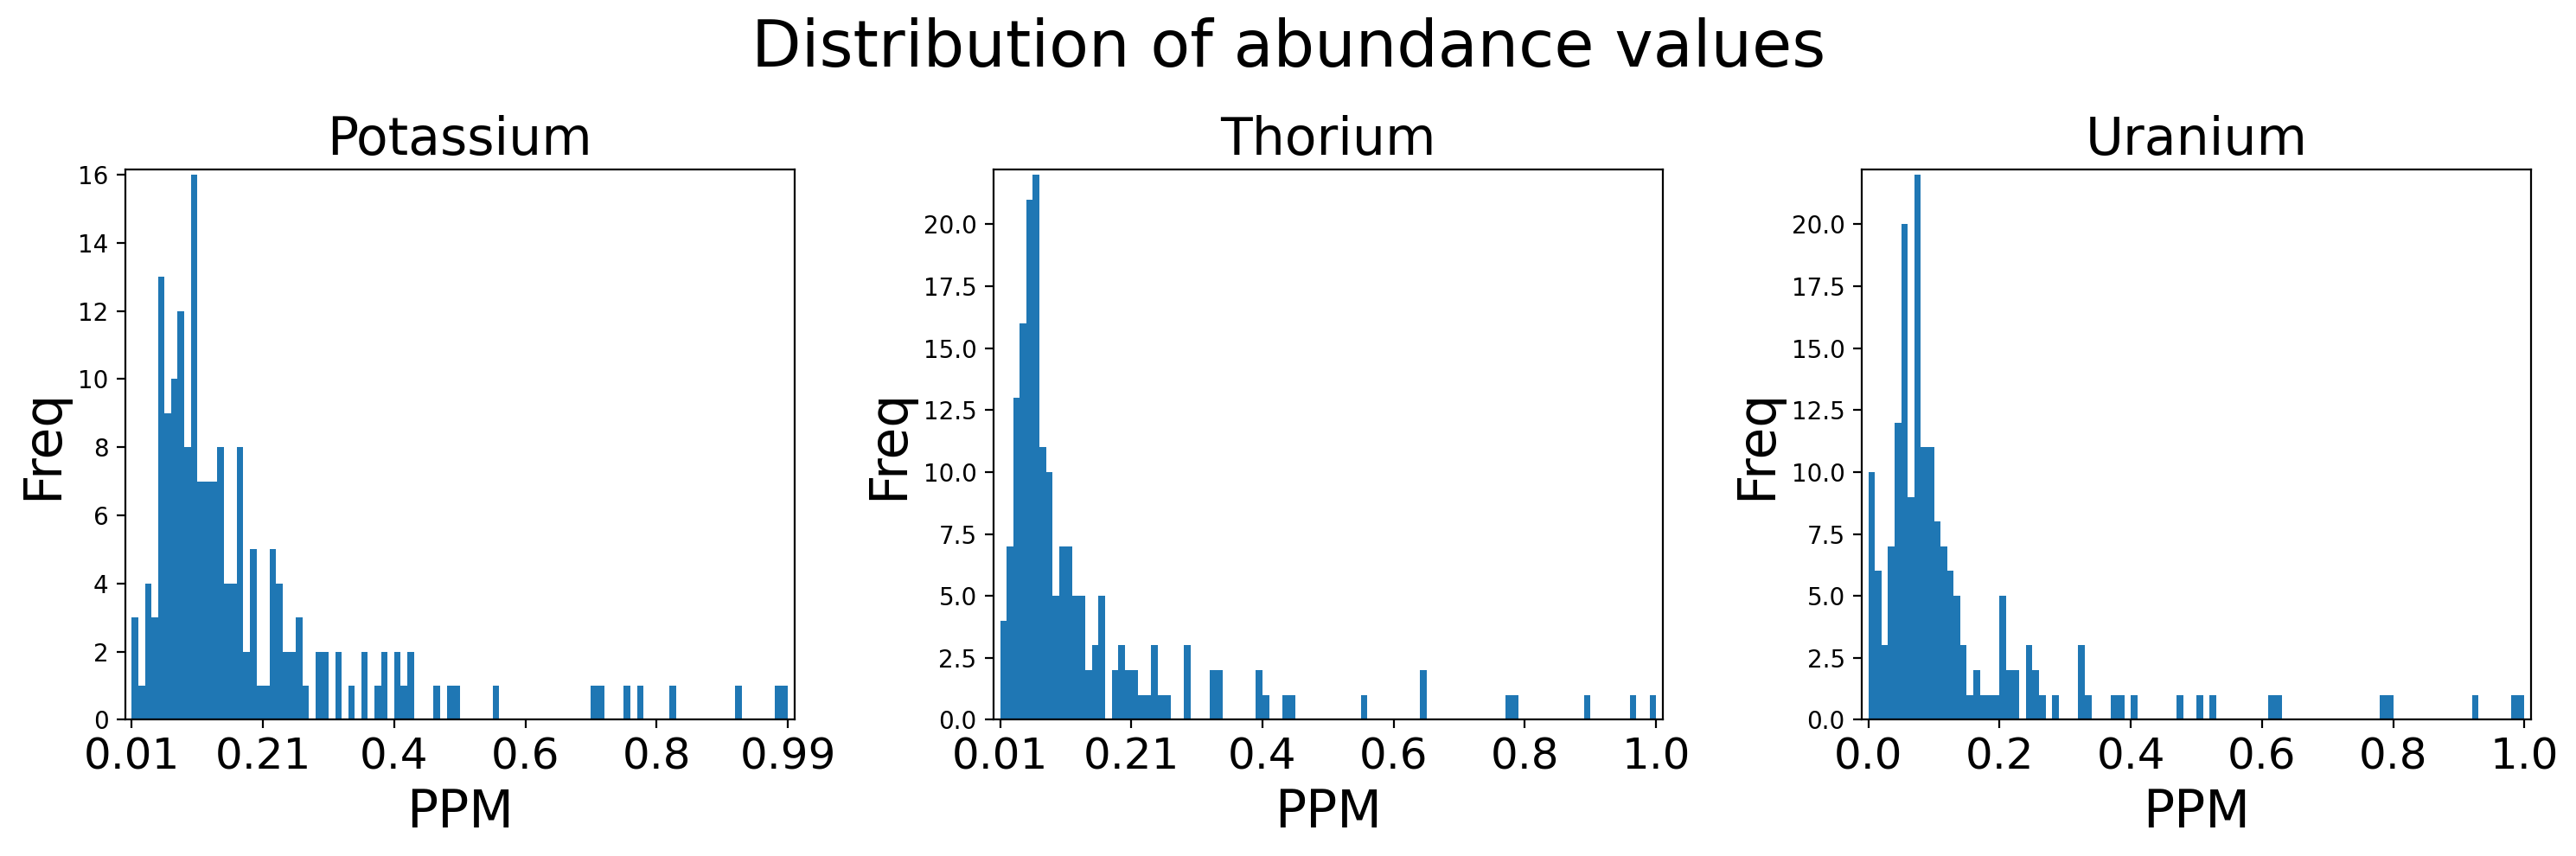

In [28]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

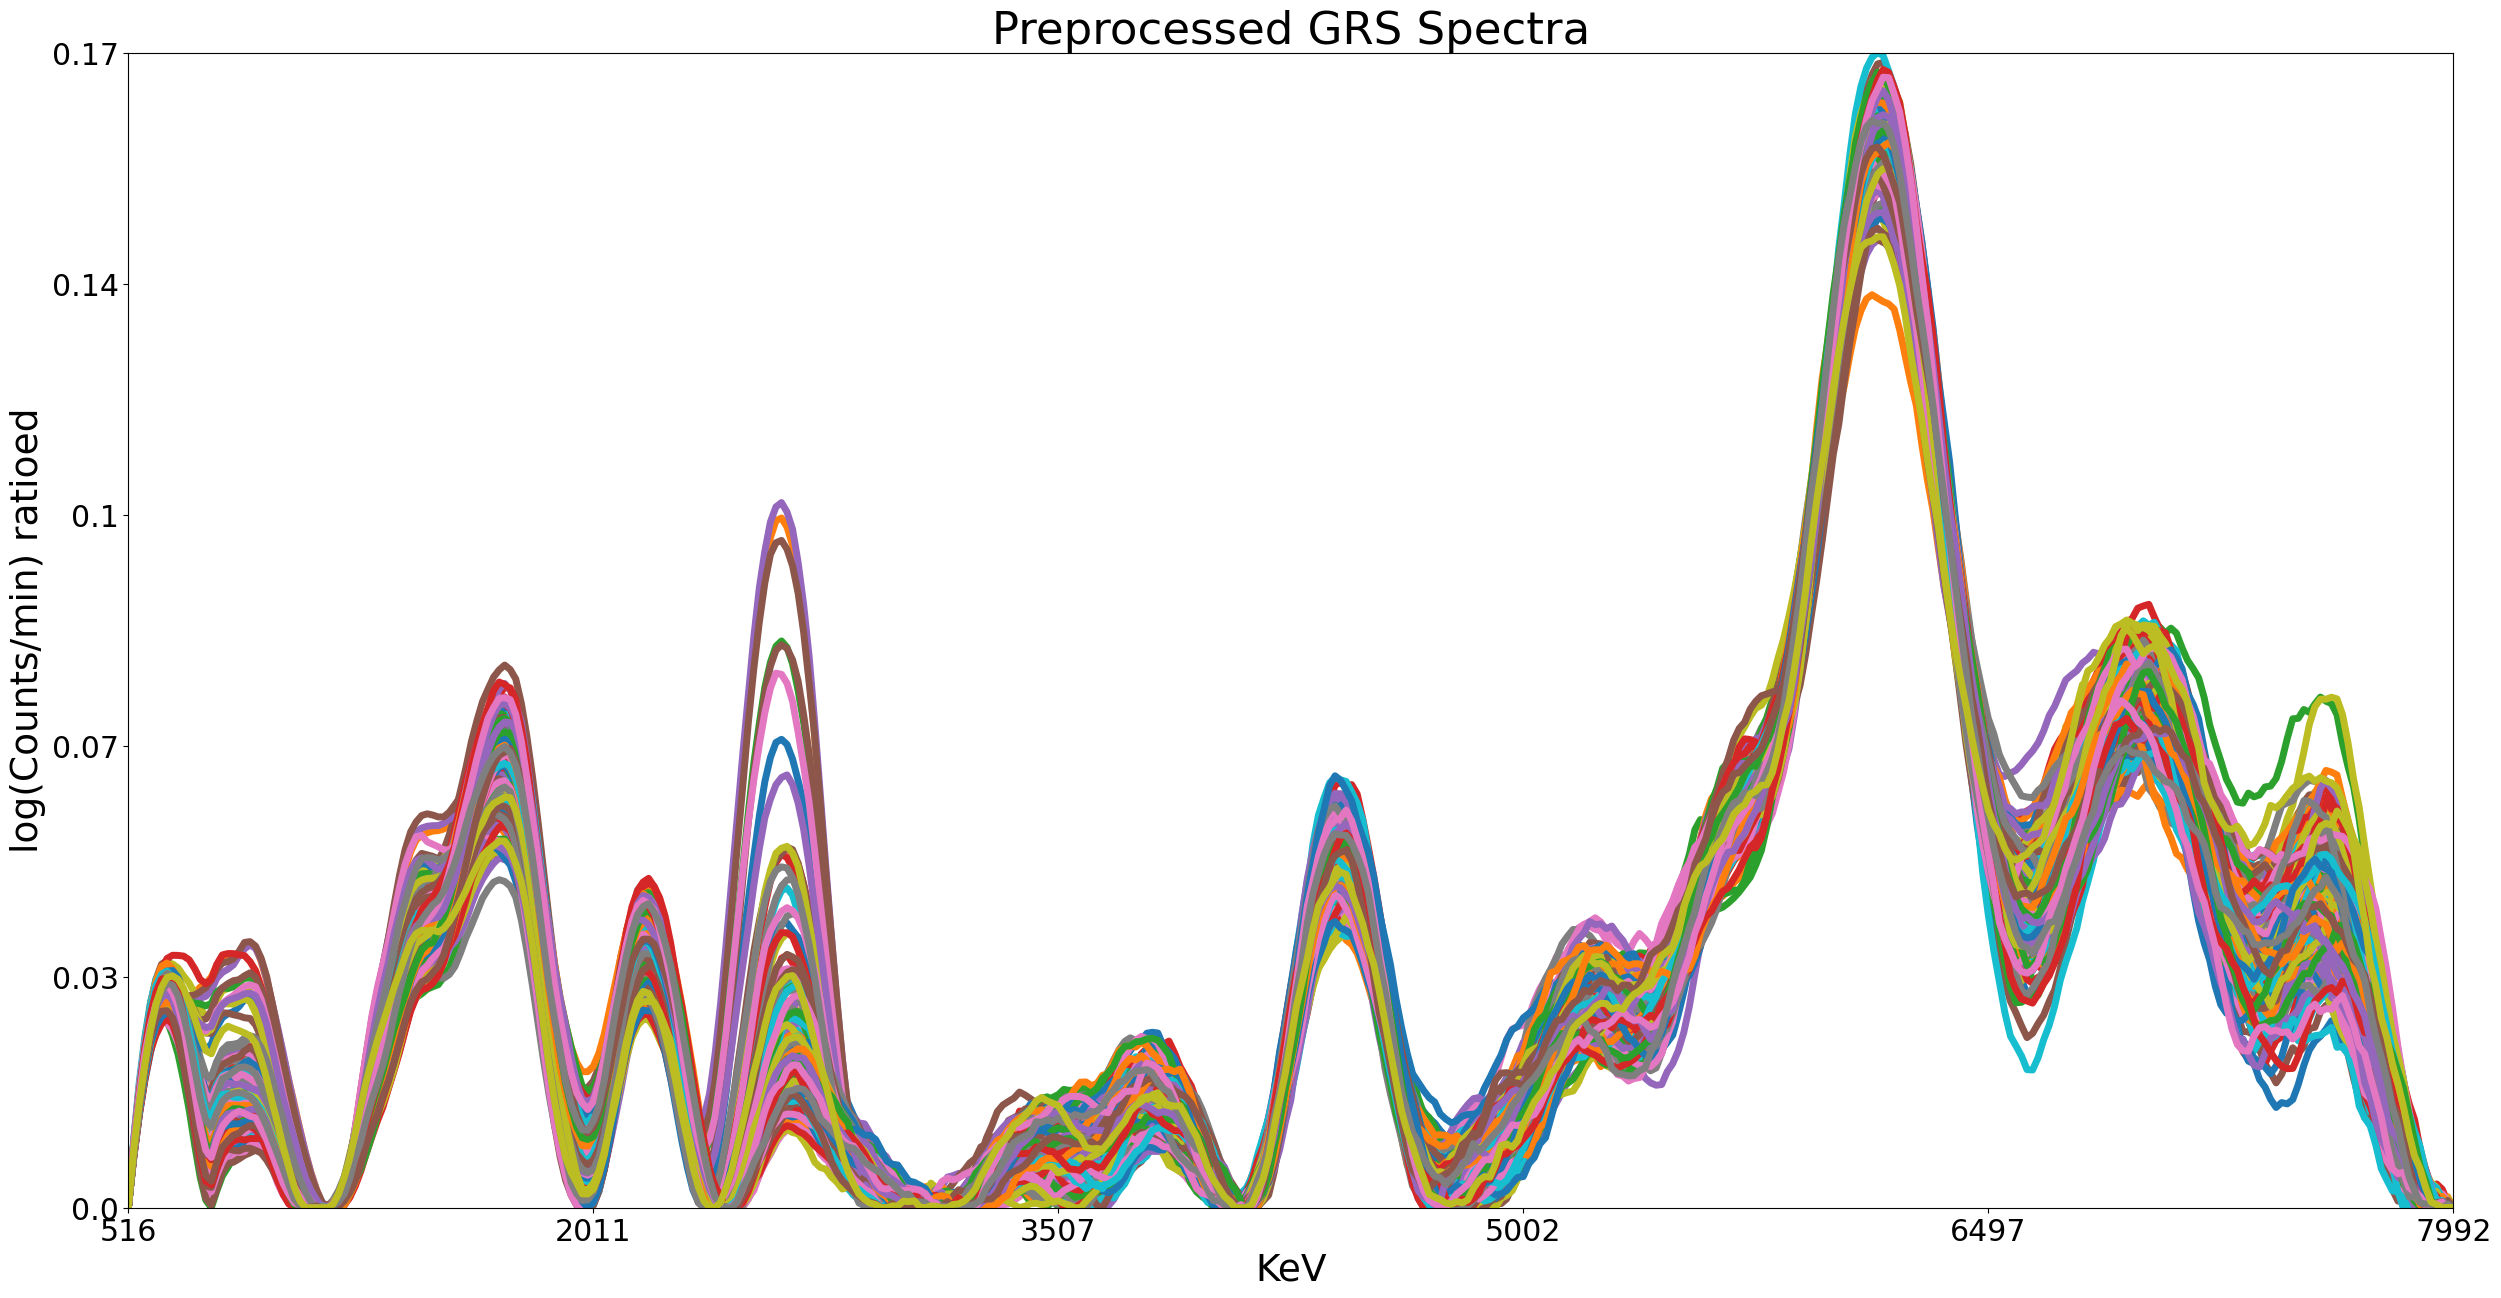

In [29]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [30]:
#import tensorflow
import tensorflow as tf

In [31]:
#set a global seed value
globalSeed=23

In [32]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [33]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [34]:
# define a funtion which creates the CAM (Channel Attention Module)
def createCAM(inputFeatureBlock,reductionRatio):
    #perform max pooling along the channel dimension
    channelMaxPooledFeatures=tf.math.reduce_max(inputFeatureBlock,
                                                axis=1,
                                                keepdims=False)
    
    #perform avg pooling along the channel dimension
    channelAvgPooledFeatures=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=1,
                                                 keepdims=False)
    
    #create the bottleneck for the MLP
    bottleneckLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1]//reductionRatio,
                                          activation='relu')
    
    #create the recontruction layer for the MLP
    outputLayer=tf.keras.layers.Dense(channelAvgPooledFeatures.shape[-1],
                                      activation='relu')
    
    
    #pass the max pooled features through the bottle-neck
    reconstructeedMaxPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #pass the avg pooled features through the bottle-neck
    reconstructeedAvgPooledFeatures=outputLayer(bottleneckLayer(channelMaxPooledFeatures))
    
    
    #add the two reconstructed features together
    summedFeatures=tf.math.add(reconstructeedMaxPooledFeatures,
                               reconstructeedAvgPooledFeatures)
    
    #apply sigmoid activation to the summed features to get the channel attention map
    channelAttentionMap=tf.keras.activations.sigmoid(summedFeatures)
    
    #return the channel attention map
    return channelAttentionMap

In [35]:
#define a function to create the Spatial attention module (SAM)
def createSAM(inputFeatureBlock,kernelSize):
    #perform max pooling on the input features
    maxPooledFeatureMap=tf.math.reduce_max(inputFeatureBlock,
                                           axis=-1,
                                           keepdims=False)
    #perform average pooling on the input features
    averagePooledFeatureMap=tf.math.reduce_mean(inputFeatureBlock,
                                                 axis=-1,
                                                 keepdims=False)
    
    #concatenate the feature maps together
    concatenatedFeatureMaps=tf.concat([tf.expand_dims(maxPooledFeatureMap,
                                                      axis=-1),
                                       tf.expand_dims(averagePooledFeatureMap,
                                                      axis=-1)],
                                      axis=-1)
    
    #create the convolutional layer to be applied to the concatenated feature map
    convolutionLayer=tf.keras.layers.Conv1D(filters=1,
                                            kernel_size=kernelSize,
                                            strides=1,
                                            padding='same',
                                            activation='sigmoid')
    
    
    #get the spatial attention map
    spatialAttentionMap=convolutionLayer(concatenatedFeatureMaps)
    
    
    #return the channel attention map
    return spatialAttentionMap

In [36]:
#define a function which creates a CBAM block
def createCBAM(inputLayer,convolutionalKernelSize,noOfConvolutionalFilters,reductionRatio,spatialKernelSize):
    #create a convolutional layer
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfConvolutionalFilters,
                                              kernel_size=convolutionalKernelSize,
                                              strides=1,
                                              padding='same')
    #get the feature block from the convolutional layer
    convolutionalFeatures=convolutionalLayer(inputLayer)
    
    #get the channel attention map
    channelAttentionMap=createCAM(convolutionalFeatures,
                                  reductionRatio)
    
    #replicate the channel attention to make it multiplicative with the features
    replicatedChannelAttentionMaps=tf.expand_dims(channelAttentionMap,
                                                  axis=1)
    replicatedChannelAttentionMaps=tf.repeat(replicatedChannelAttentionMaps,
                                             convolutionalFeatures.shape[1],
                                             axis=1)
    
    #compute the channel refined feature by performing element-wise multiplication between the features and the channel attention maps
    channelRefinedFeatures=tf.math.multiply(replicatedChannelAttentionMaps,
                                            convolutionalFeatures)
    
    #get the spatial attention map
    spatialAttentionMap=createSAM(channelRefinedFeatures,
                                  spatialKernelSize)
    
    #replicate the attention map to make it multiplicative with the channel-refined features
    replicatedSpatialAttentionMaps=tf.repeat(spatialAttentionMap,
                                             channelRefinedFeatures.shape[-1],
                                             axis=-1)
    
    #multiply the attention map with the channel refined features
    spatiallyRefinedFeatures=tf.math.multiply(replicatedSpatialAttentionMaps,
                                              channelRefinedFeatures)
    
    
    #add the refined features to the original features
    refinedFeatures=tf.math.add(convolutionalFeatures,
                                spatiallyRefinedFeatures)
    
    #return the refined features (i.e. the output of the CBAM)
    return refinedFeatures

In [37]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, stride,, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,dropoutRate,noOfCBAMBLocks):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    preluActivation=tf.keras.layers.PReLU()
    #add the 1st activation layer to the graph
    volume=preluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                         noise_shape=None,
                                         seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    #add the specified number of CBAM blocks
    for i in range(noOfCBAMBLocks):
        #add the CBAM module
        volume=createCBAM(volume,
                          convolutionalKernelSize=kernelSize,
                          noOfConvolutionalFilters=noOfFilters,
                          reductionRatio=2,
                          spatialKernelSize=3)
        
        
        #apply batch norm over the refined features
        batchNormalization=tf.keras.layers.BatchNormalization()
        #add the 1st batch-norm layer to the graph
        volume=batchNormalization(volume)
        
        #apply dropout
        dropoutLayer=tf.keras.layers.Dropout(dropoutRate,
                                             noise_shape=None,
                                             seed=globalSeed)
        #add the 1st dropout layer to the graph
        volume=dropoutLayer(volume)
    
    return volume

In [38]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[4,4,4,4]

In [39]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [40]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [41]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [42]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [43]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.3,0.3,0.3,0.3]
#create a list containing the number of CBAM blocks per convolutional block
attentionBlocksPerConvolutionBlock=[2,2,2,2]

In [44]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i],
                                                    attentionBlocksPerConvolutionBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [45]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {nuclearElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [46]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [47]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [48]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [49]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [50]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [51]:
#define regularization for the element-wise spectra
#the regularizer encourages the elemental spectra to be different
#this is done by computing the pairwise cosine distances, summing them up and maximizing this sum

#as these weights are from seperate (parallel)layers this regularization could not be implemented as inheriting the kernel regularization class
#therefore it is implemented as a loss. As such it recieves the true and predicted values but ignores them
class spectralDisimilarityRegularization(tf.keras.losses.Loss):
    def call(self,linearLayerWeights,_):
        #normalize the weights
        linearLayerWeights=tf.math.l2_normalize(linearLayerWeights,
                                                axis=-2,
                                                epsilon=1e-1)

        #multiply the weights by their transpose to get the dot products (provided the weight vectors have an l2-norm of 1)
        #sum the dot products up to get a value proportional to the sum of pairwise dot products
        unmixingSpectralSimilarity=tf.math.reduce_sum(tf.linalg.matmul(linearLayerWeights,
                                                                       linearLayerWeights,
                                                                       transpose_b=True))
        #compute sum of cosine similarities by subtracting the number of sames from the data and then dividing by half
        unmixingSpectralSimilarity=(unmixingSpectralSimilarity-linearLayerWeights.shape[-1])/2

        #return the similarity estimate which is the regularization value
        return unmixingSpectralSimilarity
    

In [52]:
#create a composite constraint to be applied to the weights of the hidden layers which are the weights
class UnitNormNonNegetivityConstraint(tf.keras.constraints.Constraint):
    def __init__(self,axis=0):
        self.axis=axis
    def __call__(self, w):
        #apply positivity constraint
        w=w*tf.cast(tf.greater_equal(w,0.0),
                    tf.keras.backend.floatx())
        
        return w



#create the composite constraint by combining the two constraints
unitNormNonNegetivityConstraint=UnitNormNonNegetivityConstraint()

In [53]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
abundanceScaledElementalSpectra=[]
#iterate through each element
for i in range(fullAbundanceEmbedding.shape[-1]):
    #create a contraintedhidden layer to learn the current element's spectra
    temp=tf.keras.layers.Dense(noOfChannels,
                               activation=None,
                               use_bias=False,
                               kernel_constraint=unitNormNonNegetivityConstraint,
                               name=allElementNames[i]+"_Spectra")
    
    
    #save the layer to a list
    elementWiseHiddenLayers.append(temp)
    #multiply the layer by a the estimated abundance to scale the spectra by the abundance
    temp=temp(tf.expand_dims(fullAbundanceEmbedding[:,i],
                             -1))
    #save the learnt spectra
    abundanceScaledElementalSpectra.append(temp)
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {abundanceScaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [54]:
#create a list to hold the unscaled elemental spectra
unscaledElementalSpectra=[]
#iterate through each element and divide its scaled spectra by its abundance to get the original spectra
for i in range(fullAbundanceEmbedding.shape[-1]):
   
    #divide the layer by its abundance to get the unscaled spectra
    temp=tf.math.divide(abundanceScaledElementalSpectra[i],
                        fullAbundanceEmbedding[:,i])
    
    #save the learnt spectra
    unscaledElementalSpectra.append(temp)
    #delete the temporary variable
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {unscaledElementalSpectra[-1].shape}")


Shape of the spectra outputed by Aluminum (None, 421)
Shape of the spectra outputed by Calcium (None, 421)
Shape of the spectra outputed by Iron (None, 421)
Shape of the spectra outputed by Magnesium (None, 421)
Shape of the spectra outputed by Oxygen (None, 421)
Shape of the spectra outputed by Silicon (None, 421)
Shape of the spectra outputed by Titanium (None, 421)
Shape of the spectra outputed by Potassium (None, 421)
Shape of the spectra outputed by Thorium (None, 421)
Shape of the spectra outputed by Uranium (None, 421)


In [55]:
#stack the abundance scaled elemental spectra together
abundanceScaledElementalSpectra=tf.stack(abundanceScaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra scaled by abundance {abundanceScaledElementalSpectra.shape}")

Shape of tensor containing all ten elemental spectra scaled by abundance (None, 421, 10)


In [56]:
#stack the abundance scaled elemental spectra together
unscaledElementalSpectra=tf.stack(unscaledElementalSpectra,axis=-1)
print(f"Shape of tensor containing all ten elemental spectra {unscaledElementalSpectra.shape}")

Shape of tensor containing all ten elemental spectra (None, 421, 10)


In [57]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(abundanceScaledElementalSpectra,
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [58]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      linearMixedSpectra,
                                      unscaledElementalSpectra],
                             name="Attention_Based_Regularized_Constrained_Dual_Encoder_Unmxing_Model")

In [59]:
#create loss functions for the embeddings, Mean Squared Error
regularAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
nuclearAbundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
#set the number of epochs the model is to be trained for
noOfEpochs=1000
#set the batch size
batchSize=16

#create the regularizer
spectralDisimilarityRegularizer=spectralDisimilarityRegularization()

#steps the number of steps to be processed in one execution
stepsPerExecution=5

In [60]:
#create a loss dictionary
lossDictionary=[regularAbundanceLossFunction,
                nuclearAbundanceLossFunction,
                recontructedSpectraLoss,
                spectralDisimilarityRegularizer]

In [61]:
#creat a list with loss weights
lossWeights=[25e-2,
             1,
             1e-3,
             1e-3]

In [62]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

In [63]:
#set the address where the untrained model will be saved
untrainedModelWeightsAddress="C:/ML4Sci/Models/untrained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights.h5"
#untrainedModelWeightsAddress="D:/Non-academic/GSOC23/untrained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

In [64]:
#save the untrained model
unmixingModel.save_weights(untrainedModelWeightsAddress,
                           overwrite=True)

In [65]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [66]:
noOfXticks=3
noOfYticks=5

In [67]:
#create an array to save the element-wise learnt spectra across folds
learntElementalSpectra=np.zeros((noOfChannels,
                                 fullAbundanceEmbedding.shape[-1]))

In [68]:
unmixingModel.load_weights(untrainedModelWeightsAddress)
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=lossDictionary,
                      loss_weights=lossWeights,
                      steps_per_execution=stepsPerExecution)

#fit the model to the current fold's data
currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra,
                                                        y=[regularElementalAbundances,
                                                           nuclearElementalAbundances,
                                                           preprocessedSpectra,
                                                           nuclearElementalAbundances],
                                                        batch_size=batchSize,
                                                        epochs=noOfEpochs)


Epoch 1/1000
12/12 [==============================] - 44s 4s/step - loss: 23.3017 - tf.math.divide_loss: 0.0058 - tf.math.abs_1_loss: 23.2876 - tf.math.reduce_sum_1_loss: -0.5458 - tf.stack_1_loss: 13.1290
Epoch 2/1000
12/12 [==============================] - 2s 185ms/step - loss: 29.7555 - tf.math.divide_loss: 7.3420e-04 - tf.math.abs_1_loss: 29.7444 - tf.math.reduce_sum_1_loss: -0.7094 - tf.stack_1_loss: 11.6963
Epoch 3/1000
12/12 [==============================] - 3s 227ms/step - loss: 30.4823 - tf.math.divide_loss: 5.3620e-04 - tf.math.abs_1_loss: 30.4721 - tf.math.reduce_sum_1_loss: -0.7906 - tf.stack_1_loss: 10.8750
Epoch 4/1000
12/12 [==============================] - 2s 193ms/step - loss: 4.1197 - tf.math.divide_loss: 5.8328e-04 - tf.math.abs_1_loss: 4.1093 - tf.math.reduce_sum_1_loss: -0.8617 - tf.stack_1_loss: 11.1597
Epoch 5/1000
12/12 [==============================] - 2s 188ms/step - loss: 1.7852 - tf.math.divide_loss: 5.2871e-04 - tf.math.abs_1_loss: 1.7744 - tf.math.redu

12/12 [==============================] - 3s 220ms/step - loss: 0.3463 - tf.math.divide_loss: 2.8755e-04 - tf.math.abs_1_loss: 0.3350 - tf.math.reduce_sum_1_loss: -0.9945 - tf.stack_1_loss: 12.2468
Epoch 40/1000
12/12 [==============================] - 2s 201ms/step - loss: 0.3119 - tf.math.divide_loss: 2.9039e-04 - tf.math.abs_1_loss: 0.3015 - tf.math.reduce_sum_1_loss: -0.9944 - tf.stack_1_loss: 11.3217
Epoch 41/1000
12/12 [==============================] - 3s 209ms/step - loss: 0.3645 - tf.math.divide_loss: 2.7296e-04 - tf.math.abs_1_loss: 0.3549 - tf.math.reduce_sum_1_loss: -0.9945 - tf.stack_1_loss: 10.5478
Epoch 42/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.4096 - tf.math.divide_loss: 2.9177e-04 - tf.math.abs_1_loss: 0.3995 - tf.math.reduce_sum_1_loss: -0.9945 - tf.stack_1_loss: 11.0016
Epoch 43/1000
12/12 [==============================] - 2s 202ms/step - loss: 0.3668 - tf.math.divide_loss: 2.8593e-04 - tf.math.abs_1_loss: 0.3571 - tf.math.reduce_sum_1_

12/12 [==============================] - 4s 353ms/step - loss: 0.1870 - tf.math.divide_loss: 2.2736e-04 - tf.math.abs_1_loss: 0.1769 - tf.math.reduce_sum_1_loss: -0.9954 - tf.stack_1_loss: 11.0592
Epoch 78/1000
12/12 [==============================] - 3s 258ms/step - loss: 0.4301 - tf.math.divide_loss: 2.1564e-04 - tf.math.abs_1_loss: 0.4205 - tf.math.reduce_sum_1_loss: -0.9952 - tf.stack_1_loss: 10.6153
Epoch 79/1000
12/12 [==============================] - 3s 210ms/step - loss: 0.2615 - tf.math.divide_loss: 2.1693e-04 - tf.math.abs_1_loss: 0.2512 - tf.math.reduce_sum_1_loss: -0.9954 - tf.stack_1_loss: 11.2377
Epoch 80/1000
12/12 [==============================] - 3s 226ms/step - loss: 0.1777 - tf.math.divide_loss: 2.1161e-04 - tf.math.abs_1_loss: 0.1680 - tf.math.reduce_sum_1_loss: -0.9955 - tf.stack_1_loss: 10.6159
Epoch 81/1000
12/12 [==============================] - 3s 233ms/step - loss: 0.2053 - tf.math.divide_loss: 2.1208e-04 - tf.math.abs_1_loss: 0.1947 - tf.math.reduce_sum_1_

12/12 [==============================] - 3s 213ms/step - loss: 0.2650 - tf.math.divide_loss: 2.4147e-04 - tf.math.abs_1_loss: 0.2540 - tf.math.reduce_sum_1_loss: -0.9953 - tf.stack_1_loss: 11.8682
Epoch 116/1000
12/12 [==============================] - 3s 216ms/step - loss: 0.2556 - tf.math.divide_loss: 2.2320e-04 - tf.math.abs_1_loss: 0.2452 - tf.math.reduce_sum_1_loss: -0.9955 - tf.stack_1_loss: 11.2854
Epoch 117/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.2729 - tf.math.divide_loss: 2.0099e-04 - tf.math.abs_1_loss: 0.2633 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 10.5445
Epoch 118/1000
12/12 [==============================] - 2s 206ms/step - loss: 0.1430 - tf.math.divide_loss: 2.0789e-04 - tf.math.abs_1_loss: 0.1340 - tf.math.reduce_sum_1_loss: -0.9956 - tf.stack_1_loss: 9.9205
Epoch 119/1000
12/12 [==============================] - 2s 201ms/step - loss: 0.1404 - tf.math.divide_loss: 1.9423e-04 - tf.math.abs_1_loss: 0.1313 - tf.math.reduce_sum

12/12 [==============================] - 2s 206ms/step - loss: 0.1234 - tf.math.divide_loss: 1.9313e-04 - tf.math.abs_1_loss: 0.1139 - tf.math.reduce_sum_1_loss: -0.9955 - tf.stack_1_loss: 10.4970
Epoch 154/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.1962 - tf.math.divide_loss: 1.8814e-04 - tf.math.abs_1_loss: 0.1857 - tf.math.reduce_sum_1_loss: -0.9955 - tf.stack_1_loss: 11.4388
Epoch 155/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.1914 - tf.math.divide_loss: 1.8981e-04 - tf.math.abs_1_loss: 0.1815 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 10.7885
Epoch 156/1000
12/12 [==============================] - 2s 206ms/step - loss: 0.1313 - tf.math.divide_loss: 1.8792e-04 - tf.math.abs_1_loss: 0.1208 - tf.math.reduce_sum_1_loss: -0.9956 - tf.stack_1_loss: 11.4570
Epoch 157/1000
12/12 [==============================] - 3s 234ms/step - loss: 0.1577 - tf.math.divide_loss: 1.8255e-04 - tf.math.abs_1_loss: 0.1468 - tf.math.reduce_su

12/12 [==============================] - 3s 214ms/step - loss: 0.0995 - tf.math.divide_loss: 1.8615e-04 - tf.math.abs_1_loss: 0.0894 - tf.math.reduce_sum_1_loss: -0.9956 - tf.stack_1_loss: 11.0219
Epoch 192/1000
12/12 [==============================] - 3s 230ms/step - loss: 0.1309 - tf.math.divide_loss: 1.7490e-04 - tf.math.abs_1_loss: 0.1213 - tf.math.reduce_sum_1_loss: -0.9956 - tf.stack_1_loss: 10.5229
Epoch 193/1000
12/12 [==============================] - 3s 222ms/step - loss: 0.1451 - tf.math.divide_loss: 1.9224e-04 - tf.math.abs_1_loss: 0.1354 - tf.math.reduce_sum_1_loss: -0.9955 - tf.stack_1_loss: 10.6769
Epoch 194/1000
12/12 [==============================] - 3s 216ms/step - loss: 0.1307 - tf.math.divide_loss: 1.6488e-04 - tf.math.abs_1_loss: 0.1213 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 10.3580
Epoch 195/1000
12/12 [==============================] - 3s 226ms/step - loss: 0.1235 - tf.math.divide_loss: 1.6083e-04 - tf.math.abs_1_loss: 0.1132 - tf.math.reduce_su

12/12 [==============================] - 3s 217ms/step - loss: 0.1137 - tf.math.divide_loss: 1.6626e-04 - tf.math.abs_1_loss: 0.1051 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 9.6232
Epoch 230/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.1030 - tf.math.divide_loss: 1.6278e-04 - tf.math.abs_1_loss: 0.0923 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 11.6796
Epoch 231/1000
12/12 [==============================] - 3s 221ms/step - loss: 0.0901 - tf.math.divide_loss: 1.5302e-04 - tf.math.abs_1_loss: 0.0806 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 10.4218
Epoch 232/1000
12/12 [==============================] - 3s 212ms/step - loss: 0.1141 - tf.math.divide_loss: 1.6526e-04 - tf.math.abs_1_loss: 0.1043 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 10.7454
Epoch 233/1000
12/12 [==============================] - 3s 226ms/step - loss: 0.0886 - tf.math.divide_loss: 1.6549e-04 - tf.math.abs_1_loss: 0.0788 - tf.math.reduce_sum

12/12 [==============================] - 3s 229ms/step - loss: 0.0550 - tf.math.divide_loss: 1.5074e-04 - tf.math.abs_1_loss: 0.0460 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 9.9014
Epoch 268/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.0880 - tf.math.divide_loss: 1.6670e-04 - tf.math.abs_1_loss: 0.0790 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 9.9273
Epoch 269/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.1123 - tf.math.divide_loss: 1.4855e-04 - tf.math.abs_1_loss: 0.1021 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 11.0903
Epoch 270/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.1422 - tf.math.divide_loss: 1.6093e-04 - tf.math.abs_1_loss: 0.1315 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 11.6521
Epoch 271/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.0869 - tf.math.divide_loss: 1.6315e-04 - tf.math.abs_1_loss: 0.0767 - tf.math.reduce_sum_

12/12 [==============================] - 3s 209ms/step - loss: 0.0696 - tf.math.divide_loss: 1.4803e-04 - tf.math.abs_1_loss: 0.0600 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.5984
Epoch 306/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.0728 - tf.math.divide_loss: 1.4571e-04 - tf.math.abs_1_loss: 0.0637 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.1460
Epoch 307/1000
12/12 [==============================] - 3s 230ms/step - loss: 0.0832 - tf.math.divide_loss: 1.4990e-04 - tf.math.abs_1_loss: 0.0732 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.9086
Epoch 308/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.1041 - tf.math.divide_loss: 1.4144e-04 - tf.math.abs_1_loss: 0.0944 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.7057
Epoch 309/1000
12/12 [==============================] - 3s 211ms/step - loss: 0.1385 - tf.math.divide_loss: 1.4014e-04 - tf.math.abs_1_loss: 0.1281 - tf.math.reduce_su

12/12 [==============================] - 3s 224ms/step - loss: 0.1543 - tf.math.divide_loss: 1.3431e-04 - tf.math.abs_1_loss: 0.1440 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 11.2883
Epoch 344/1000
12/12 [==============================] - 3s 226ms/step - loss: 0.1511 - tf.math.divide_loss: 1.4499e-04 - tf.math.abs_1_loss: 0.1414 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.7067
Epoch 345/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.1002 - tf.math.divide_loss: 1.4011e-04 - tf.math.abs_1_loss: 0.0891 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.9997
Epoch 346/1000
12/12 [==============================] - 3s 232ms/step - loss: 0.1574 - tf.math.divide_loss: 1.4590e-04 - tf.math.abs_1_loss: 0.1476 - tf.math.reduce_sum_1_loss: -0.9958 - tf.stack_1_loss: 10.7865
Epoch 347/1000
12/12 [==============================] - 3s 215ms/step - loss: 0.1186 - tf.math.divide_loss: 1.4727e-04 - tf.math.abs_1_loss: 0.1085 - tf.math.reduce_su

12/12 [==============================] - 3s 240ms/step - loss: 0.1180 - tf.math.divide_loss: 1.4976e-04 - tf.math.abs_1_loss: 0.1079 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 11.1347
Epoch 382/1000
12/12 [==============================] - 3s 218ms/step - loss: 0.1212 - tf.math.divide_loss: 1.5269e-04 - tf.math.abs_1_loss: 0.1108 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 11.3053
Epoch 383/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.1367 - tf.math.divide_loss: 1.4632e-04 - tf.math.abs_1_loss: 0.1267 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.9421
Epoch 384/1000
12/12 [==============================] - 3s 231ms/step - loss: 0.1851 - tf.math.divide_loss: 1.4418e-04 - tf.math.abs_1_loss: 0.1744 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.7333
Epoch 385/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.1334 - tf.math.divide_loss: 1.4151e-04 - tf.math.abs_1_loss: 0.1243 - tf.math.reduce_su

12/12 [==============================] - 3s 218ms/step - loss: 0.3577 - tf.math.divide_loss: 1.7623e-04 - tf.math.abs_1_loss: 0.3478 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 10.8389
Epoch 420/1000
12/12 [==============================] - 3s 208ms/step - loss: 0.3289 - tf.math.divide_loss: 1.6774e-04 - tf.math.abs_1_loss: 0.3185 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.3606
Epoch 421/1000
12/12 [==============================] - 3s 234ms/step - loss: 0.2470 - tf.math.divide_loss: 1.8720e-04 - tf.math.abs_1_loss: 0.2369 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 11.1038
Epoch 422/1000
12/12 [==============================] - 3s 250ms/step - loss: 0.2195 - tf.math.divide_loss: 1.5988e-04 - tf.math.abs_1_loss: 0.2086 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.8521
Epoch 423/1000
12/12 [==============================] - 3s 231ms/step - loss: 0.1703 - tf.math.divide_loss: 1.4030e-04 - tf.math.abs_1_loss: 0.1610 - tf.math.reduce_su

12/12 [==============================] - 3s 215ms/step - loss: 0.1224 - tf.math.divide_loss: 1.1972e-04 - tf.math.abs_1_loss: 0.1127 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.6787
Epoch 458/1000
12/12 [==============================] - 3s 228ms/step - loss: 0.0724 - tf.math.divide_loss: 1.2101e-04 - tf.math.abs_1_loss: 0.0623 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.0476
Epoch 459/1000
12/12 [==============================] - 3s 212ms/step - loss: 0.0569 - tf.math.divide_loss: 1.2224e-04 - tf.math.abs_1_loss: 0.0469 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 10.9247
Epoch 460/1000
12/12 [==============================] - 3s 221ms/step - loss: 0.0720 - tf.math.divide_loss: 1.2857e-04 - tf.math.abs_1_loss: 0.0620 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 10.9713
Epoch 461/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.0781 - tf.math.divide_loss: 1.1366e-04 - tf.math.abs_1_loss: 0.0678 - tf.math.reduce_su

12/12 [==============================] - 3s 221ms/step - loss: 0.0446 - tf.math.divide_loss: 1.0322e-04 - tf.math.abs_1_loss: 0.0344 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 11.1982
Epoch 496/1000
12/12 [==============================] - 3s 208ms/step - loss: 0.0438 - tf.math.divide_loss: 9.9620e-05 - tf.math.abs_1_loss: 0.0338 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.9177
Epoch 497/1000
12/12 [==============================] - 3s 220ms/step - loss: 0.0512 - tf.math.divide_loss: 1.1381e-04 - tf.math.abs_1_loss: 0.0419 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 10.2617
Epoch 498/1000
12/12 [==============================] - 3s 216ms/step - loss: 0.0512 - tf.math.divide_loss: 1.1332e-04 - tf.math.abs_1_loss: 0.0415 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 10.6184
Epoch 499/1000
12/12 [==============================] - 3s 210ms/step - loss: 0.0551 - tf.math.divide_loss: 1.0431e-04 - tf.math.abs_1_loss: 0.0454 - tf.math.reduce_su

12/12 [==============================] - 3s 209ms/step - loss: 0.0394 - tf.math.divide_loss: 1.0301e-04 - tf.math.abs_1_loss: 0.0287 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 11.6188
Epoch 534/1000
12/12 [==============================] - 3s 219ms/step - loss: 0.0714 - tf.math.divide_loss: 1.0297e-04 - tf.math.abs_1_loss: 0.0619 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 10.4589
Epoch 535/1000
12/12 [==============================] - 2s 202ms/step - loss: 0.0558 - tf.math.divide_loss: 1.0023e-04 - tf.math.abs_1_loss: 0.0462 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 10.5361
Epoch 536/1000
12/12 [==============================] - 3s 210ms/step - loss: 0.0692 - tf.math.divide_loss: 1.0669e-04 - tf.math.abs_1_loss: 0.0597 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 10.5449
Epoch 537/1000
12/12 [==============================] - 2s 206ms/step - loss: 0.0533 - tf.math.divide_loss: 1.1335e-04 - tf.math.abs_1_loss: 0.0433 - tf.math.reduce_su

12/12 [==============================] - 3s 235ms/step - loss: 0.0355 - tf.math.divide_loss: 1.1083e-04 - tf.math.abs_1_loss: 0.0255 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 10.9657
Epoch 572/1000
12/12 [==============================] - 2s 203ms/step - loss: 0.0365 - tf.math.divide_loss: 9.8651e-05 - tf.math.abs_1_loss: 0.0265 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.9145
Epoch 573/1000
12/12 [==============================] - 3s 220ms/step - loss: 0.0765 - tf.math.divide_loss: 1.0382e-04 - tf.math.abs_1_loss: 0.0662 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.2316
Epoch 574/1000
12/12 [==============================] - 3s 225ms/step - loss: 0.1091 - tf.math.divide_loss: 1.0367e-04 - tf.math.abs_1_loss: 0.0987 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 11.3847
Epoch 575/1000
12/12 [==============================] - 3s 212ms/step - loss: 0.1117 - tf.math.divide_loss: 9.3655e-05 - tf.math.abs_1_loss: 0.1018 - tf.math.reduce_su

12/12 [==============================] - 3s 219ms/step - loss: 0.0610 - tf.math.divide_loss: 9.1322e-05 - tf.math.abs_1_loss: 0.0510 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 10.9338
Epoch 610/1000
12/12 [==============================] - 3s 228ms/step - loss: 0.0746 - tf.math.divide_loss: 8.7578e-05 - tf.math.abs_1_loss: 0.0651 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.3825
Epoch 611/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.1142 - tf.math.divide_loss: 1.1139e-04 - tf.math.abs_1_loss: 0.1048 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 10.3538
Epoch 612/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.0642 - tf.math.divide_loss: 1.0811e-04 - tf.math.abs_1_loss: 0.0544 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 10.7883
Epoch 613/1000
12/12 [==============================] - 3s 215ms/step - loss: 0.0530 - tf.math.divide_loss: 9.5297e-05 - tf.math.abs_1_loss: 0.0432 - tf.math.reduce_su

12/12 [==============================] - 3s 227ms/step - loss: 0.3856 - tf.math.divide_loss: 7.5454e-05 - tf.math.abs_1_loss: 0.3754 - tf.math.reduce_sum_1_loss: -0.9957 - tf.stack_1_loss: 11.1862
Epoch 648/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.4197 - tf.math.divide_loss: 8.9622e-05 - tf.math.abs_1_loss: 0.4093 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.3760
Epoch 649/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.3413 - tf.math.divide_loss: 8.6455e-05 - tf.math.abs_1_loss: 0.3317 - tf.math.reduce_sum_1_loss: -0.9959 - tf.stack_1_loss: 10.5615
Epoch 650/1000
12/12 [==============================] - 3s 227ms/step - loss: 0.2837 - tf.math.divide_loss: 7.6776e-05 - tf.math.abs_1_loss: 0.2731 - tf.math.reduce_sum_1_loss: -0.9960 - tf.stack_1_loss: 11.5910
Epoch 651/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.4444 - tf.math.divide_loss: 7.7708e-05 - tf.math.abs_1_loss: 0.4348 - tf.math.reduce_su

12/12 [==============================] - 3s 213ms/step - loss: 0.0718 - tf.math.divide_loss: 7.8587e-05 - tf.math.abs_1_loss: 0.0617 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.1041
Epoch 686/1000
12/12 [==============================] - 3s 220ms/step - loss: 0.1205 - tf.math.divide_loss: 7.9294e-05 - tf.math.abs_1_loss: 0.1113 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 10.2381
Epoch 687/1000
12/12 [==============================] - 3s 215ms/step - loss: 0.1338 - tf.math.divide_loss: 7.5358e-05 - tf.math.abs_1_loss: 0.1247 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 10.0802
Epoch 688/1000
12/12 [==============================] - 3s 225ms/step - loss: 0.1435 - tf.math.divide_loss: 7.3004e-05 - tf.math.abs_1_loss: 0.1334 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.1463
Epoch 689/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.1940 - tf.math.divide_loss: 7.4588e-05 - tf.math.abs_1_loss: 0.1841 - tf.math.reduce_su

12/12 [==============================] - 2s 207ms/step - loss: 0.1141 - tf.math.divide_loss: 8.9353e-05 - tf.math.abs_1_loss: 0.1039 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.1530
Epoch 724/1000
12/12 [==============================] - 2s 206ms/step - loss: 0.1105 - tf.math.divide_loss: 9.4865e-05 - tf.math.abs_1_loss: 0.1005 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 11.0061
Epoch 725/1000
12/12 [==============================] - 3s 224ms/step - loss: 0.0881 - tf.math.divide_loss: 9.1305e-05 - tf.math.abs_1_loss: 0.0777 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 11.3676
Epoch 726/1000
12/12 [==============================] - 3s 227ms/step - loss: 0.0922 - tf.math.divide_loss: 8.9382e-05 - tf.math.abs_1_loss: 0.0824 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 10.7038
Epoch 727/1000
12/12 [==============================] - 3s 211ms/step - loss: 0.0722 - tf.math.divide_loss: 7.6770e-05 - tf.math.abs_1_loss: 0.0620 - tf.math.reduce_su

12/12 [==============================] - 3s 231ms/step - loss: 0.0342 - tf.math.divide_loss: 6.5970e-05 - tf.math.abs_1_loss: 0.0239 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 11.2625
Epoch 762/1000
12/12 [==============================] - 3s 227ms/step - loss: 0.0441 - tf.math.divide_loss: 6.0782e-05 - tf.math.abs_1_loss: 0.0342 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.8751
Epoch 763/1000
12/12 [==============================] - 3s 214ms/step - loss: 0.0492 - tf.math.divide_loss: 6.4314e-05 - tf.math.abs_1_loss: 0.0384 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 11.7828
Epoch 764/1000
12/12 [==============================] - 3s 224ms/step - loss: 0.0560 - tf.math.divide_loss: 6.3058e-05 - tf.math.abs_1_loss: 0.0463 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 10.6380
Epoch 765/1000
12/12 [==============================] - 3s 224ms/step - loss: 0.0551 - tf.math.divide_loss: 7.4106e-05 - tf.math.abs_1_loss: 0.0445 - tf.math.reduce_su

12/12 [==============================] - 3s 248ms/step - loss: 0.0511 - tf.math.divide_loss: 5.5102e-05 - tf.math.abs_1_loss: 0.0420 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.0743
Epoch 800/1000
12/12 [==============================] - 3s 228ms/step - loss: 0.0727 - tf.math.divide_loss: 5.8850e-05 - tf.math.abs_1_loss: 0.0623 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 11.3365
Epoch 801/1000
12/12 [==============================] - 3s 216ms/step - loss: 0.0439 - tf.math.divide_loss: 6.5568e-05 - tf.math.abs_1_loss: 0.0341 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.7883
Epoch 802/1000
12/12 [==============================] - 3s 242ms/step - loss: 0.0426 - tf.math.divide_loss: 6.4840e-05 - tf.math.abs_1_loss: 0.0322 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 11.4492
Epoch 803/1000
12/12 [==============================] - 3s 234ms/step - loss: 0.0505 - tf.math.divide_loss: 6.6722e-05 - tf.math.abs_1_loss: 0.0414 - tf.math.reduce_su

12/12 [==============================] - 3s 229ms/step - loss: 0.0495 - tf.math.divide_loss: 5.4180e-05 - tf.math.abs_1_loss: 0.0403 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 10.2353
Epoch 838/1000
12/12 [==============================] - 3s 211ms/step - loss: 0.0442 - tf.math.divide_loss: 5.2206e-05 - tf.math.abs_1_loss: 0.0337 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 11.4342
Epoch 839/1000
12/12 [==============================] - 3s 210ms/step - loss: 0.0361 - tf.math.divide_loss: 4.9732e-05 - tf.math.abs_1_loss: 0.0255 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 11.5733
Epoch 840/1000
12/12 [==============================] - 3s 226ms/step - loss: 0.0417 - tf.math.divide_loss: 5.3972e-05 - tf.math.abs_1_loss: 0.0317 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 11.0132
Epoch 841/1000
12/12 [==============================] - 3s 209ms/step - loss: 0.0394 - tf.math.divide_loss: 5.0087e-05 - tf.math.abs_1_loss: 0.0293 - tf.math.reduce_su

12/12 [==============================] - 3s 229ms/step - loss: 0.0392 - tf.math.divide_loss: 4.8779e-05 - tf.math.abs_1_loss: 0.0295 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.6513
Epoch 876/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.0430 - tf.math.divide_loss: 4.9985e-05 - tf.math.abs_1_loss: 0.0322 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 11.7729
Epoch 877/1000
12/12 [==============================] - 3s 217ms/step - loss: 0.0470 - tf.math.divide_loss: 4.8490e-05 - tf.math.abs_1_loss: 0.0361 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 11.8075
Epoch 878/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.0326 - tf.math.divide_loss: 5.9716e-05 - tf.math.abs_1_loss: 0.0225 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 11.0908
Epoch 879/1000
12/12 [==============================] - 3s 234ms/step - loss: 0.0305 - tf.math.divide_loss: 6.5313e-05 - tf.math.abs_1_loss: 0.0212 - tf.math.reduce_su

12/12 [==============================] - 3s 230ms/step - loss: 0.0253 - tf.math.divide_loss: 4.8869e-05 - tf.math.abs_1_loss: 0.0156 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 10.6733
Epoch 914/1000
12/12 [==============================] - 2s 208ms/step - loss: 0.0343 - tf.math.divide_loss: 4.5204e-05 - tf.math.abs_1_loss: 0.0245 - tf.math.reduce_sum_1_loss: -0.9964 - tf.stack_1_loss: 10.8139
Epoch 915/1000
12/12 [==============================] - 3s 229ms/step - loss: 0.0399 - tf.math.divide_loss: 4.4974e-05 - tf.math.abs_1_loss: 0.0299 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 10.9149
Epoch 916/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.0662 - tf.math.divide_loss: 4.2704e-05 - tf.math.abs_1_loss: 0.0565 - tf.math.reduce_sum_1_loss: -0.9963 - tf.stack_1_loss: 10.6645
Epoch 917/1000
12/12 [==============================] - 3s 221ms/step - loss: 0.0460 - tf.math.divide_loss: 5.2754e-05 - tf.math.abs_1_loss: 0.0364 - tf.math.reduce_su

12/12 [==============================] - 3s 246ms/step - loss: 0.0274 - tf.math.divide_loss: 4.5278e-05 - tf.math.abs_1_loss: 0.0181 - tf.math.reduce_sum_1_loss: -0.9967 - tf.stack_1_loss: 10.3514
Epoch 952/1000
12/12 [==============================] - 3s 215ms/step - loss: 0.0248 - tf.math.divide_loss: 4.2040e-05 - tf.math.abs_1_loss: 0.0155 - tf.math.reduce_sum_1_loss: -0.9967 - tf.stack_1_loss: 10.3020
Epoch 953/1000
12/12 [==============================] - 3s 228ms/step - loss: 0.0285 - tf.math.divide_loss: 4.2556e-05 - tf.math.abs_1_loss: 0.0181 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 11.3309
Epoch 954/1000
12/12 [==============================] - 3s 223ms/step - loss: 0.0263 - tf.math.divide_loss: 4.2238e-05 - tf.math.abs_1_loss: 0.0151 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 12.2321
Epoch 955/1000
12/12 [==============================] - 3s 216ms/step - loss: 0.0252 - tf.math.divide_loss: 4.1669e-05 - tf.math.abs_1_loss: 0.0151 - tf.math.reduce_su

12/12 [==============================] - 3s 217ms/step - loss: 0.0390 - tf.math.divide_loss: 4.1903e-05 - tf.math.abs_1_loss: 0.0288 - tf.math.reduce_sum_1_loss: -0.9966 - tf.stack_1_loss: 11.2135
Epoch 990/1000
12/12 [==============================] - 3s 212ms/step - loss: 0.0344 - tf.math.divide_loss: 3.6227e-05 - tf.math.abs_1_loss: 0.0241 - tf.math.reduce_sum_1_loss: -0.9965 - tf.stack_1_loss: 11.2122
Epoch 991/1000
12/12 [==============================] - 2s 206ms/step - loss: 0.0598 - tf.math.divide_loss: 3.4005e-05 - tf.math.abs_1_loss: 0.0490 - tf.math.reduce_sum_1_loss: -0.9962 - tf.stack_1_loss: 11.7885
Epoch 992/1000
12/12 [==============================] - 3s 213ms/step - loss: 0.3140 - tf.math.divide_loss: 3.7445e-05 - tf.math.abs_1_loss: 0.3033 - tf.math.reduce_sum_1_loss: -0.9961 - tf.stack_1_loss: 11.7102
Epoch 993/1000
12/12 [==============================] - 3s 211ms/step - loss: 10.0837 - tf.math.divide_loss: 3.7515e-05 - tf.math.abs_1_loss: 10.0732 - tf.math.reduce_

In [85]:
#set the address where the untrained model will be saved
#trainedModelWeightsAddress="D:/Non-academic/GSOC23/trained_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"
trainedModelWeightsAddress="C:/ML4Sci/Models/trained_Attention_Based_Regularized_Constrainted_Dual_Unmixing_Model_With_PReLU_Weights_and_Linear_Decoder.h5"

#save the untrained model
unmixingModel.save_weights(trainedModelWeightsAddress,
                           overwrite=True)

In [93]:
#iterate through all the elements
for i in range(len(allElementNames)):

    #get the mean spectrum for the current element
    currentElementSpectrum=unmixingModel.get_layer(allElementNames[i]+"_Spectra").get_weights()[0][0]

    #save the spectrum
    learntElementalSpectra[:,i]=currentElementSpectrum

In [94]:
#normalize the learnt spectra
learntElementalSpectra=learntElementalSpectra/np.linalg.norm(learntElementalSpectra,axis=0,keepdims=True)

In [95]:
#create a dictionary to hold energies corresponding to the peaks for each element
elementalPeaks={}

#create a temporary list with elemental peaks
tempPeaks=[[843,1014,2211],[],[846,1213,1809,7634],
           [1369,1809],[],[1779],[983],
           [1460],[584,2615],[351,609]]

#iterate through all the elements and add their names (keys) and empty arrays (values) which will hold the peak energies to the dictionary
for i in range(len(allElementNames)):
    elementalPeaks[allElementNames[i]]=tempPeaks[i]
    
#delete the temporary array
del tempPeaks

Text(0.5, 0.98, 'Element-wise Learnt spectra')

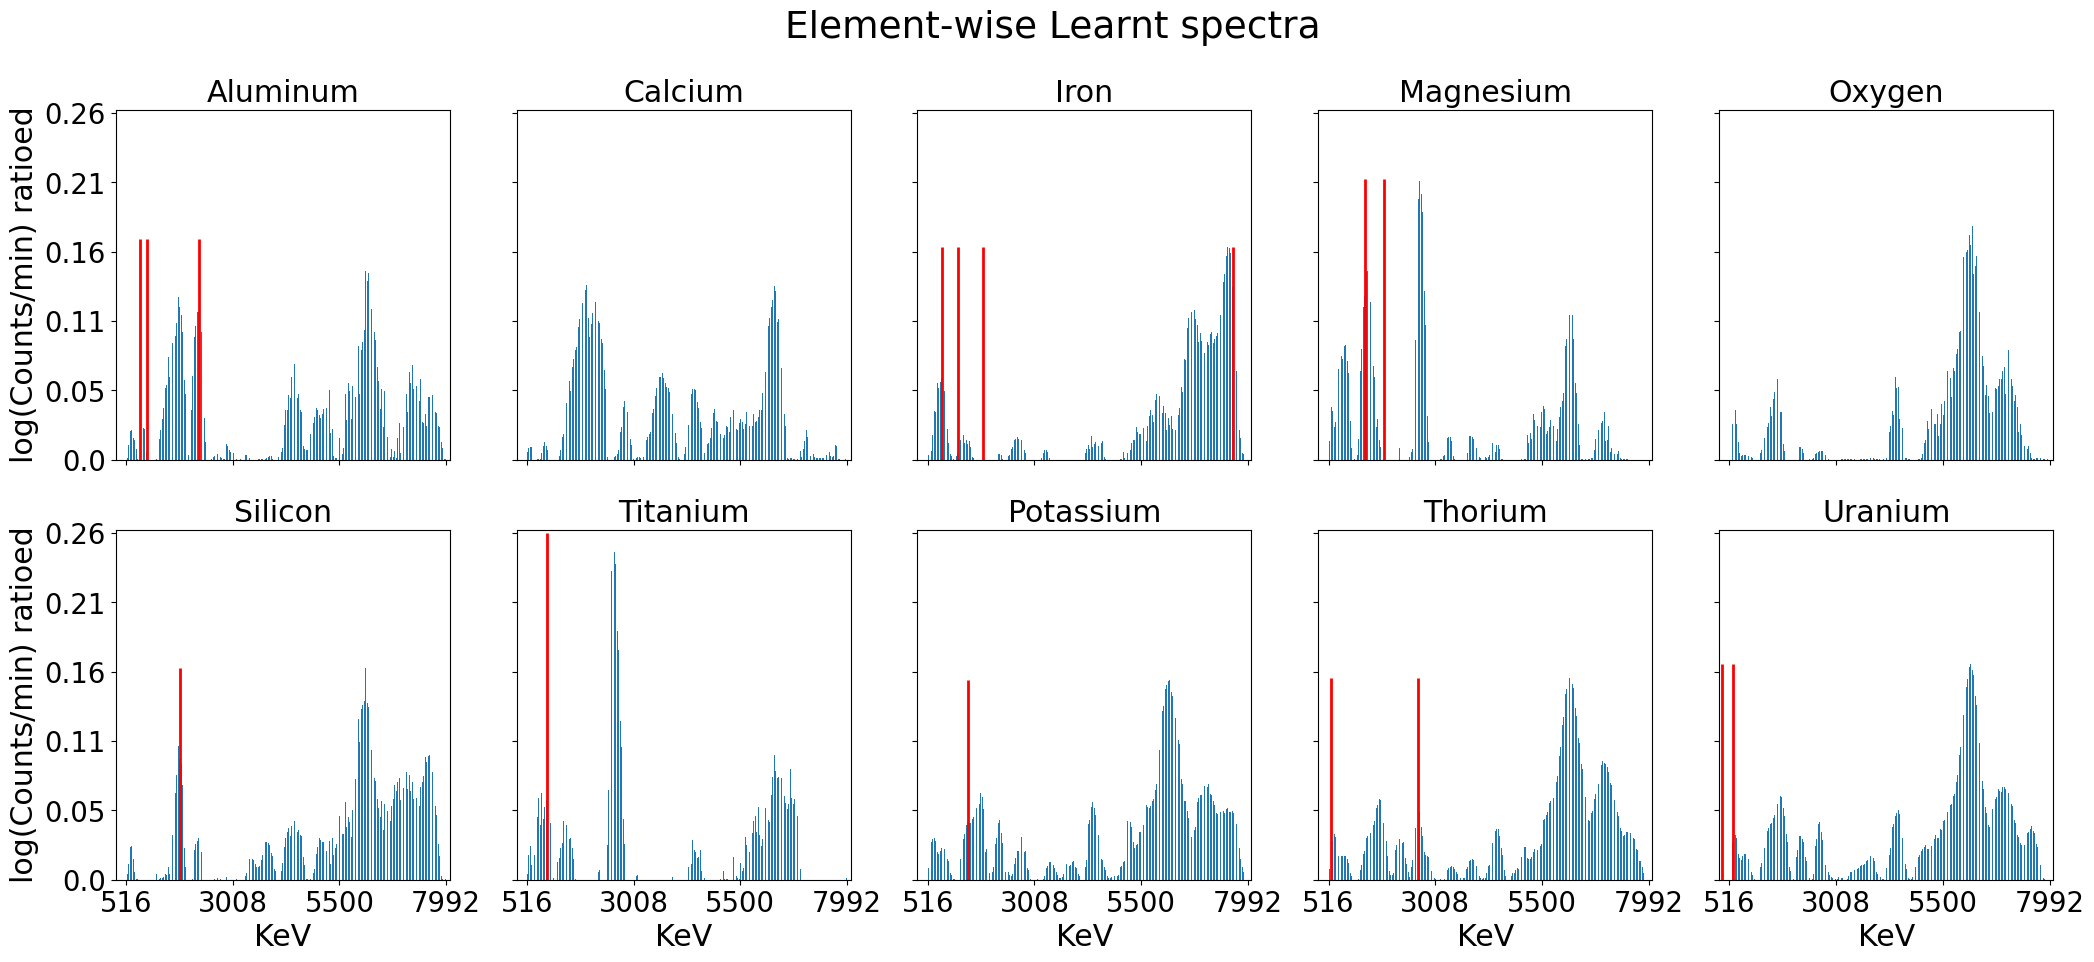

In [101]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=learntElementalSpectra[:,i]

    #plot the spectrum
    axes[i//5,i%5].bar(relaventEnergyBands,
                       currentElementSpectrum,
                       lw=10,
                       width=10)
    
    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                np.ptp(learntElementalSpectra)/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                                np.ptp(learntElementalSpectra)/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

Text(0.5, 0.98, 'Element-wise Learnt spectra')

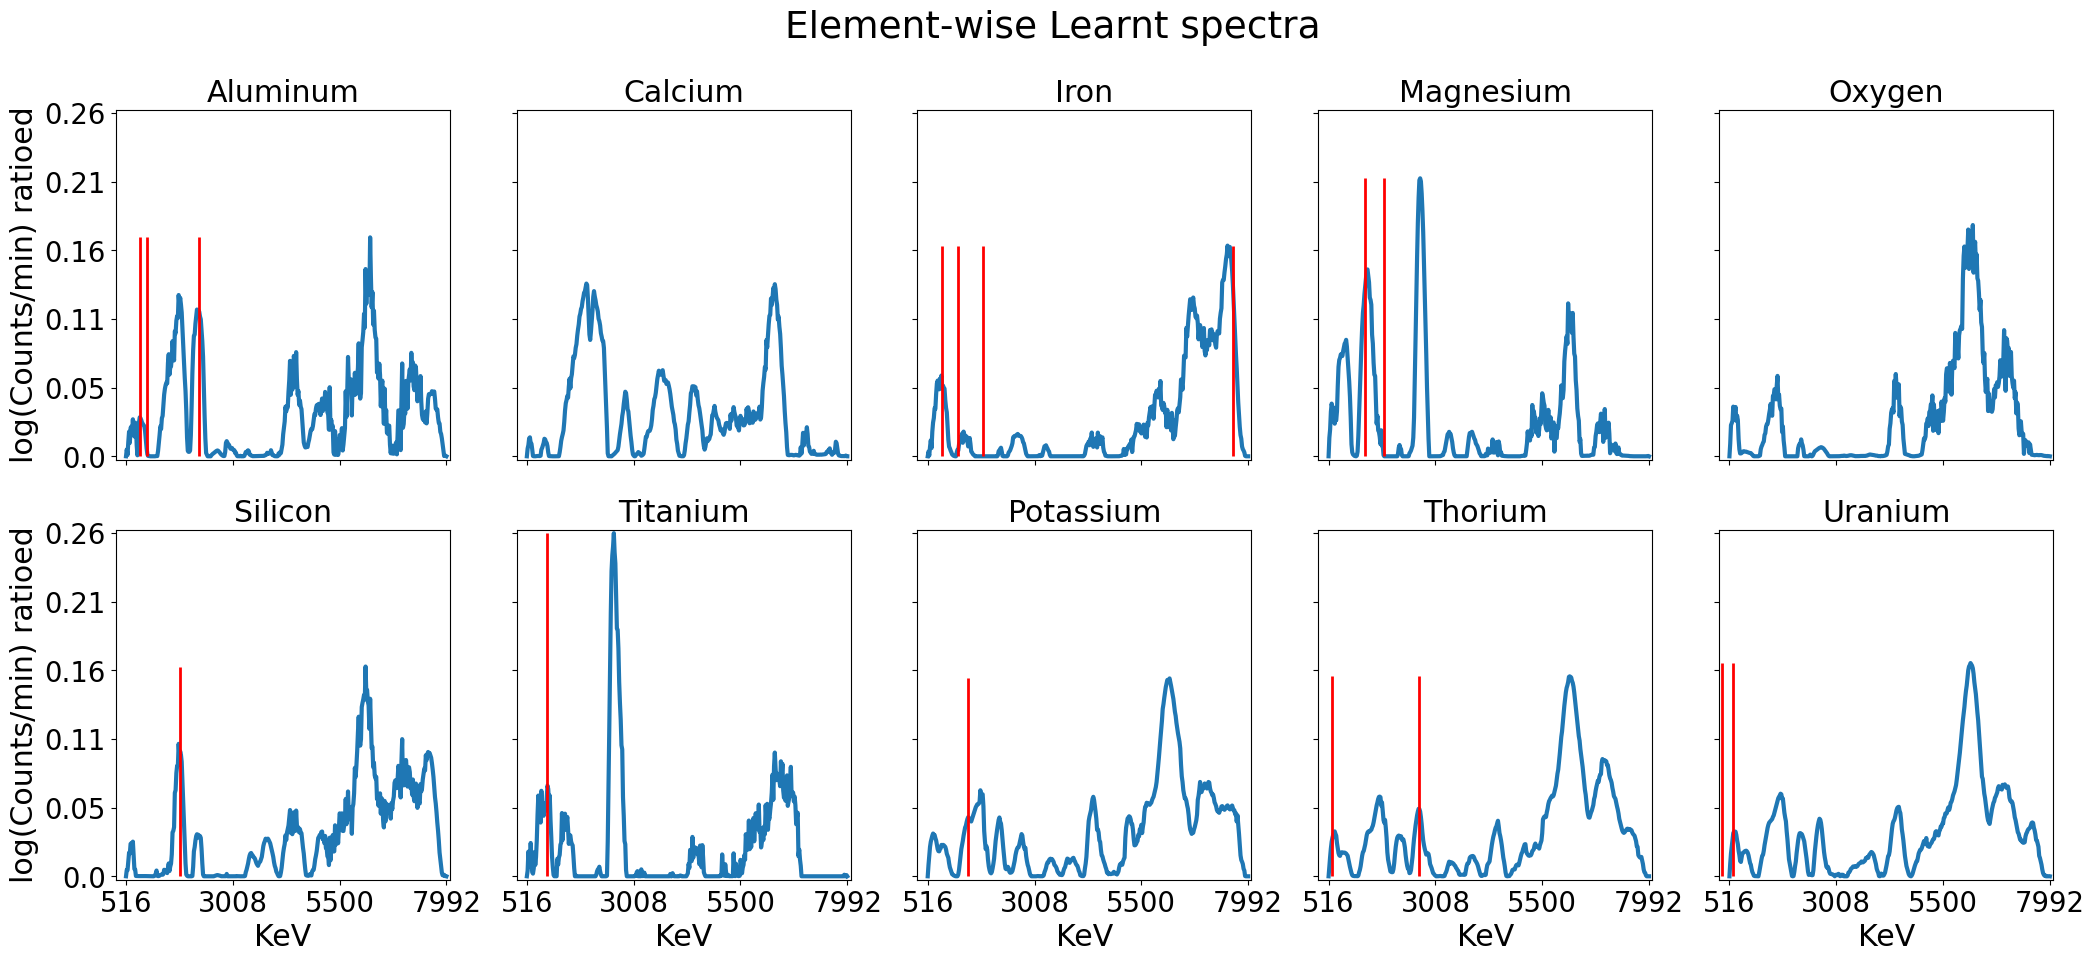

In [102]:
#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)


#iterate through all the elements
for i in range(len(allElementNames)):

    #get the name of the current element
    currentElementName=allElementNames[i]

    #get the mean spectrum for the current element
    currentElementSpectrum=learntElementalSpectra[:,i]

    #plot the spectrum
    axes[i//5,i%5].plot(relaventEnergyBands,
                        currentElementSpectrum,
                        lw=3)
    
    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0.01)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                np.ptp(learntElementalSpectra)/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                                np.ptp(learntElementalSpectra)/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra",
                fontsize=baseFontSize*1.5)

In [103]:
#import uniform_filter from scipy
from scipy.ndimage import uniform_filter1d

In [104]:
#smooth the spectra using a mean filter
smoothenedElementalSpectra=uniform_filter1d(learntElementalSpectra,
                                            size=7,
                                            axis=0)

Text(0.5, 0.98, 'Element-wise Learnt spectra (Smoothened)')

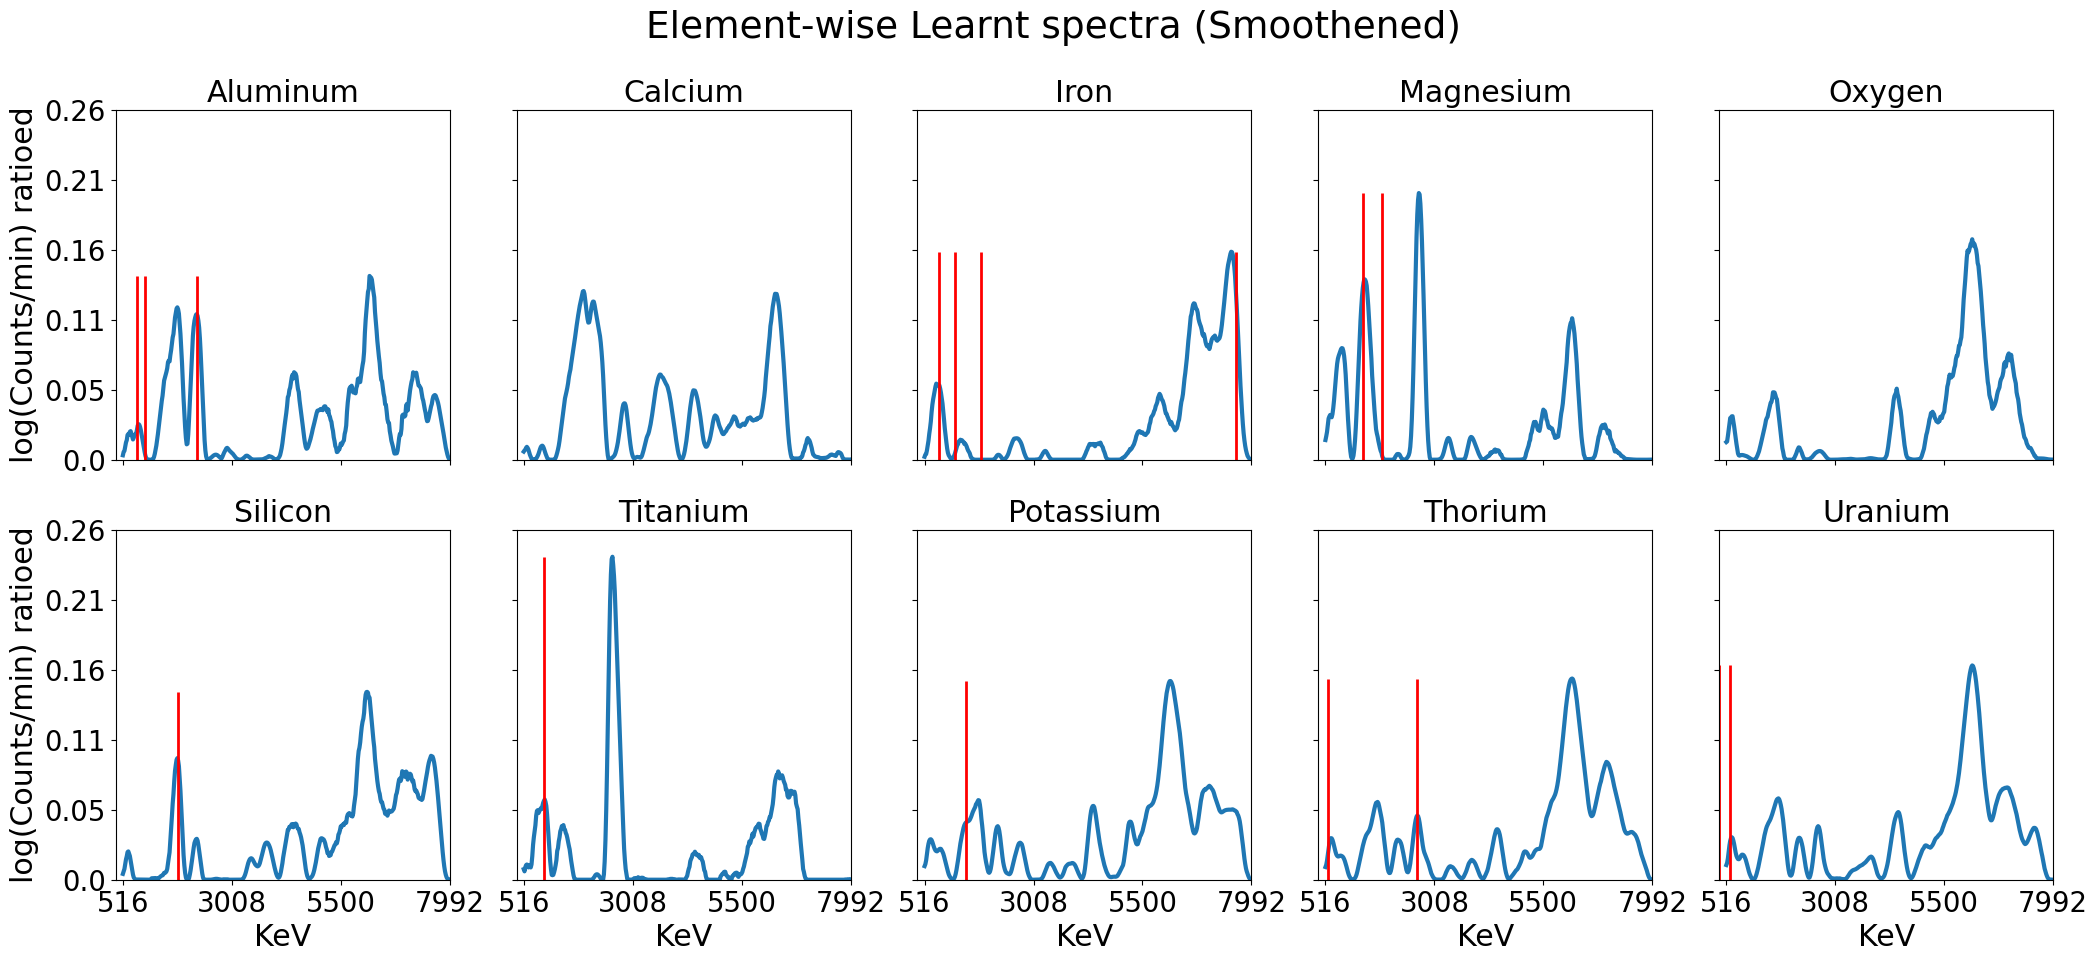

In [105]:
#create an array to hold the smoothened element-wise spectra
smoothenedElementWiseSpectra=np.zeros_like(learntElementalSpectra)

#create a figure 
figure,axes=plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(5*5,5*2),
                         dpi=100,
                         sharex=True,
                         sharey=True)

#iterate through the element-wise spectra and smoothen them
for i in range(len(allElementNames)):
    
    #get the name of the current element
    currentElementName=allElementNames[i]
    
    #get the current specturm
    currentElementSpectrum=smoothenedElementalSpectra[:,i]
    
    #plot the spectrum
    axes[i//5,i%5].plot(relaventEnergyBands,
                        currentElementSpectrum,
                        lw=3)

    #plot the peak postions
    if len(elementalPeaks[currentElementName])>0:
        axes[i//5,i%5].vlines(x=elementalPeaks[currentElementName],
                              ymin=0,
                              ymax=np.amax(currentElementSpectrum),
                              colors='red',
                              lw=2)
        #add the position of the peaks as text
        #for currentPeakPositon in elementalPeaks[currentElementName]:
            #axes[i//5,i%5].text(x=currentPeakPositon,
            #                    y=np.amax(currentElementSpectrum)+0.0001,
            #                    s=str(currentPeakPositon),
            #                    fontsize=baseFontSize*1)
    
    
    #add the title
    axes[i//5,i%5].set_title(currentElementName,
                             fontsize=baseFontSize*1.2)

    #set the margin
    axes[i//5,i%5].margins(0)

    #add xticks and label
    if i//5==1:
        axes[i//5,i%5].set_xticks(np.arange(np.amin(relaventEnergyBands),
                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                  labels=np.round(np.arange(np.amin(relaventEnergyBands),
                                                            np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                                                            np.ptp(relaventEnergyBands)/noOfXticks),
                                                  0).astype('int'),
                                  fontsize=baseFontSize*1.1)
        axes[i//5,i%5].set_xlabel("KeV",fontsize=baseFontSize*1.2)

    #add yticks and label
    if i%5==0:
        axes[i//5,i%5].set_ylabel("log(Counts/min) ratioed",fontsize=baseFontSize*1.2)

    axes[i//5,i%5].set_yticks(np.arange(0,
                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                np.ptp(learntElementalSpectra)/noOfYticks),
                      labels=np.round(np.arange(0,
                                                np.amax(learntElementalSpectra)+np.ptp(learntElementalSpectra)/noOfYticks,
                                                np.ptp(learntElementalSpectra)/noOfYticks),
                                      2),
                      fontsize=baseFontSize*1.1)
#add a title
figure.suptitle(f"Element-wise Learnt spectra (Smoothened)",
                fontsize=baseFontSize*1.5)

